In [1]:
# KHOÁ LUẬN TỐT NGHIỆP - MODELS - PHẦN 2
# Họ và tên: Lại Minh Phú - MSSV: 20127593
# Họ và tên: Hồ Minh Thanh Tài - MSSV: 20127068

In [1]:
%pip install imblearn
%pip install lightgbm
%pip install xgboost
%pip install catboost
%pip install --quiet optuna


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.decomposition import PCA
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import datasets, linear_model, metrics
from imblearn.over_sampling import SMOTE

# Thự viên các mô hình sử dụng
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
import catboost as cb


%matplotlib inline
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, auc, ConfusionMatrixDisplay

# Các thư viện khác
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
import collections
from collections import Counter
import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
# 284315 Not-Fraud, 492 Fraud
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
x = df.drop(['Class','Time'], axis=1)

y = df['Class']

## Spilt thành tập train và tập test

In [7]:
seed = 42

# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = seed)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

## Scale 

In [8]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_train

array([[ 8.66514037e-01, -3.18740903e-01, -2.57831791e-01, ...,
         2.69826619e-01, -4.45139004e-01, -1.67972028e-01],
       [-1.87412161e-01, -4.94335107e-01,  7.18249023e-01, ...,
        -2.29014575e+00, -1.18801493e+00,  3.34265734e-01],
       [ 2.43934573e-02,  5.38221071e-01, -3.86388287e-01, ...,
         1.26284605e+00,  4.48261891e-01, -1.40000000e-01],
       ...,
       [-7.36254539e-02,  6.61185829e-01,  7.02202848e-01, ...,
        -7.54486386e-01, -1.57908244e+00, -2.52587413e-01],
       [-1.32706845e+00,  1.63267692e+00, -1.40917571e+00, ...,
         3.05218623e+00,  2.46838464e+00, -2.93706294e-01],
       [ 5.43598556e-01, -6.06975975e-01,  1.08415011e-01, ...,
        -8.78479616e-04,  2.07096240e-01,  1.27272727e+00]])

In [10]:
X_test

array([[-7.40091104e+00,  6.07683172e+00, -9.82623873e+00, ...,
        -1.24410856e+01, -8.01989481e+00,  4.78587413e+00],
       [ 1.43967206e-01, -2.00432112e+00, -1.63402851e-01, ...,
         2.44127890e-01,  6.89809266e-01,  6.96671329e+00],
       [ 6.18042059e-01, -4.68482847e-01, -5.43876581e-03, ...,
         6.18960568e-02, -5.12163588e-02,  1.25874126e-01],
       ...,
       [ 1.00485653e-02, -1.25394779e-01, -7.54347971e-01, ...,
         2.19564896e+00,  2.60956835e+00, -2.00979021e-01],
       [-2.29493924e-01,  6.60140661e-01,  7.78913926e-01, ...,
         2.41254081e-01, -2.13886375e+00, -2.57482517e-01],
       [-7.19520654e-01,  6.60807294e-01, -3.61072611e-01, ...,
         7.66141087e-01, -4.70610893e+00,  1.23679720e+01]])

## SMOTE

In [11]:
print('Kích thước tập dữ liệu trước SMOTE %s' % Counter(y_train))

smt = SMOTE(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

print('Kích thước tập dữ liệu trước SMOTE %s' % Counter(y_train_smt))

Kích thước tập dữ liệu trước SMOTE Counter({0: 227451, 1: 394})
Kích thước tập dữ liệu trước SMOTE Counter({0: 227451, 1: 227451})


### Biểu diễn đồ thị ROC-AUC

In [12]:
def plot_roc_cur(FPR, TPR):  
    plt.plot(FPR, TPR, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

### Biểu diễn đồ thị PR-AUC

In [13]:
def plot_pr_cur(precision, recall, pr_auc):
    plt.plot(recall, precision, color='orange', label=f'PR AUC = {pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

### Hàm chạy mô hình

In [14]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    pr_auc = auc(recall, precision)
    
    time_taken = time.time()-t0
    
#   print("Precision  = {}".format(precision))
#   print("Recall  = {}".format(recall))
    print("F1 Score  = {}".format(f1))
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Area under Precision-Recall Curve = {}".format(pr_auc))
    print("Time taken = {}".format(time_taken))
    
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    FPR, TPR, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(FPR, TPR)
    plot_pr_cur(precision, recall, pr_auc)
    
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    
    return model, f1, accuracy, roc_auc, pr_auc, time_taken

# SUPERVISED (LightGBM, KNeighbor, LogisticRegression, RandomForest, SVC, XGBoost, CatBoost)

## LightGBM 

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032929 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339
F1 Score  = 0.1891891891891892
Accuracy = 0.9915733295881465
ROC Area under Curve = 0.7818629913980224
Area under Precision-Recall Curve = 0.34276311448812413
Time taken = 1.9336612224578857
              precision    recall  f1-score   support

           0    0.99926   0.99230   0.99576     56864
           1    0.11336   0.57143   0.18919        98

    accuracy                        0.99157     56962
   macro avg    0.55631   0.78186   0.59248     56962
weighted avg    0.99773   0.99157   0.99438

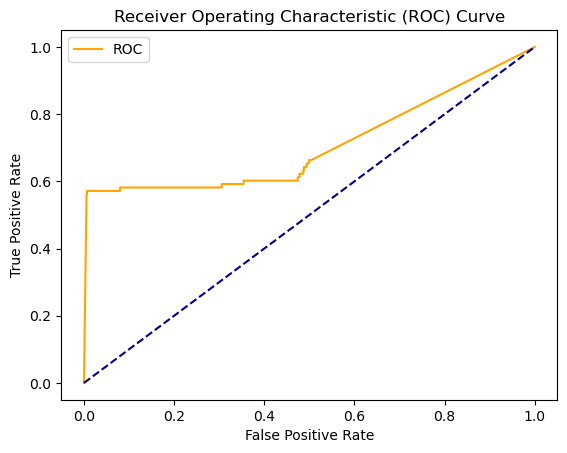

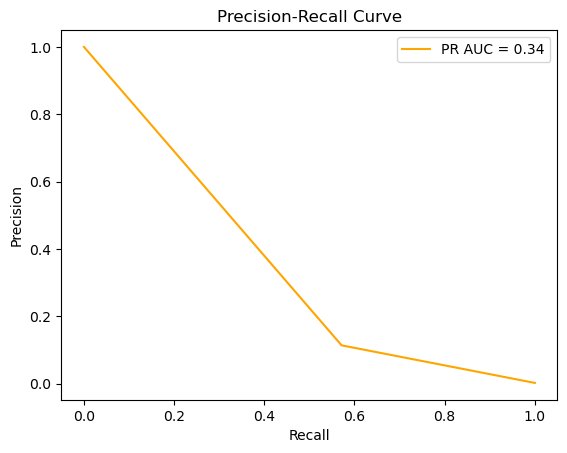

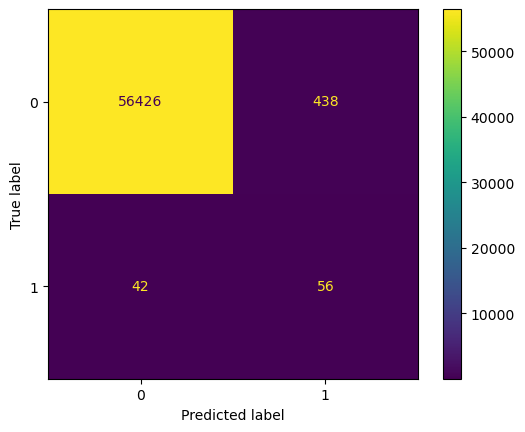

In [15]:
model_lgbsmt = lgb.LGBMClassifier()

model_lgbsmt, f1_score_lgbsmt, accuracy_lgbsmt, roc_auc_lgbsmt, pr_auc_lgbsmt, tt_lgbsmt = run_model(model_lgbsmt, X_train, y_train, X_test, y_test)

## LightGBM + SMOTE

[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
F1 Score  = 0.6880000000000001
Accuracy = 0.9986306660580738
ROC Area under Curve = 0.9381951781838227
Area under Precision-Recall Curve = 0.7217755804263352
Time taken = 4.534712553024292
              precision    recall  f1-score   support

           0    0.99979   0.99884   0.99931     56864
           1    0.56579   0.87755   0.68800        98

    accuracy                        0.99863     56962
   macro avg    0.78279   0.93820   0.84366     56962
weighted avg    0.99904   0.99863   0.99878     56962



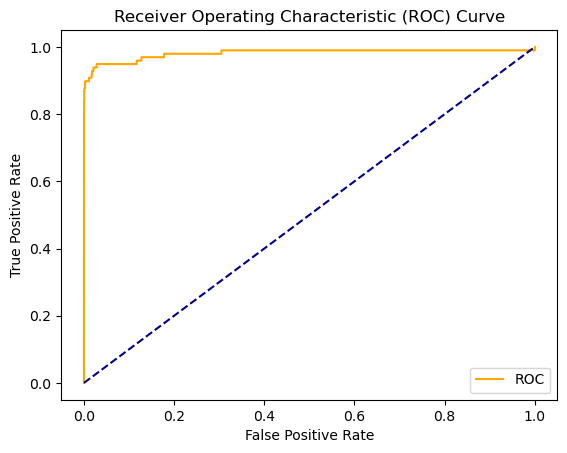

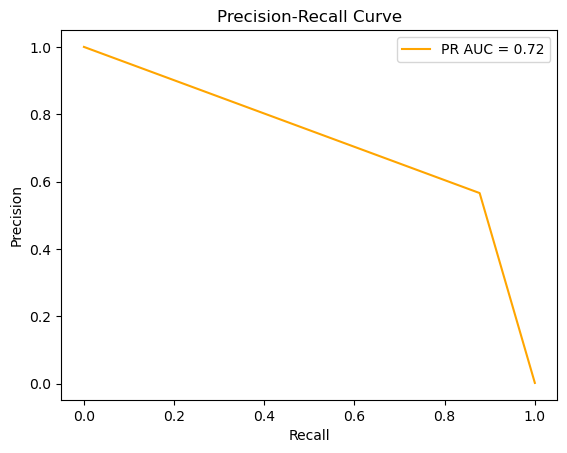

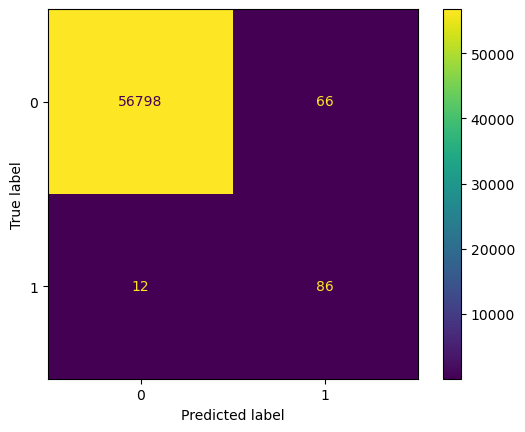

In [16]:
model_lgbsmt = lgb.LGBMClassifier()

model_lgbsmt, f1_score_lgbsmt, accuracy_lgbsmt, roc_auc_lgbsmt, pr_auc_lgbsmt, tt_lgbsmt= run_model(model_lgbsmt, X_train_smt, y_train_smt, X_test, y_test)

## KNeighborsClassifier

F1 Score  = 0.839080459770115
Accuracy = 0.9995084442259752
ROC Area under Curve = 0.8724226008636431
Area under Precision-Recall Curve = 0.8529315820285489
Time taken = 21.510103940963745
              precision    recall  f1-score   support

           0    0.99956   0.99995   0.99975     56864
           1    0.96053   0.74490   0.83908        98

    accuracy                        0.99951     56962
   macro avg    0.98004   0.87242   0.91942     56962
weighted avg    0.99949   0.99951   0.99948     56962



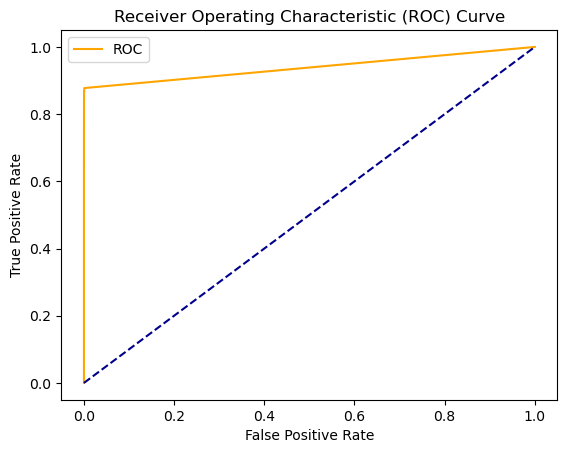

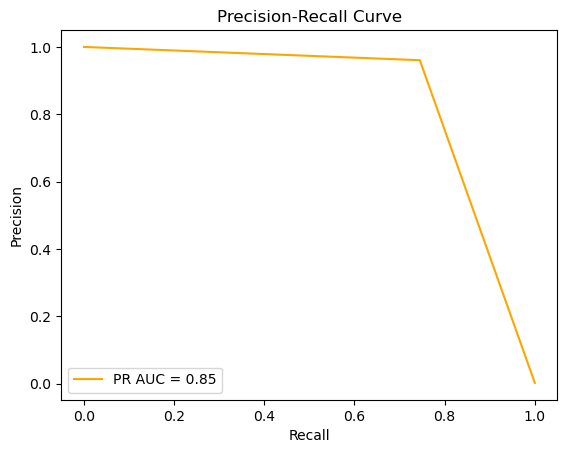

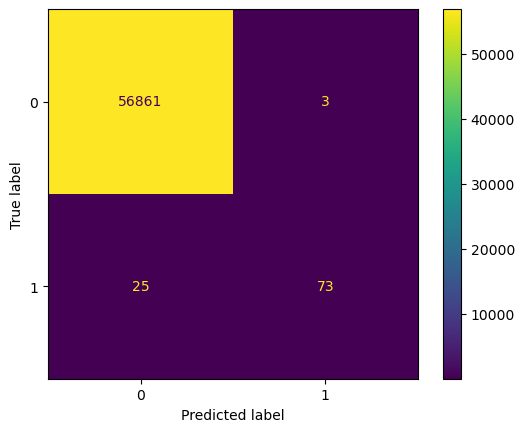

In [17]:
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)

knn_clf, f1_score_knn, accuracy_knn, roc_auc_knn, pr_auc_knn, tt_knn = run_model(knn_clf, X_train, y_train, X_test, y_test)

## KNeighborsClassifier +SMOTE

F1 Score  = 0.631578947368421
Accuracy = 0.9982795547909132
ROC Area under Curve = 0.9278328241820083
Area under Precision-Recall Curve = 0.6786943175149347
Time taken = 45.82525300979614
              precision    recall  f1-score   support

           0    0.99975   0.99852   0.99914     56864
           1    0.50000   0.85714   0.63158        98

    accuracy                        0.99828     56962
   macro avg    0.74988   0.92783   0.81536     56962
weighted avg    0.99889   0.99828   0.99851     56962



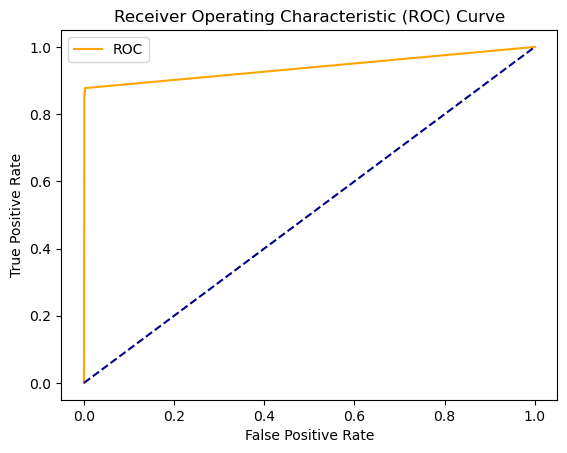

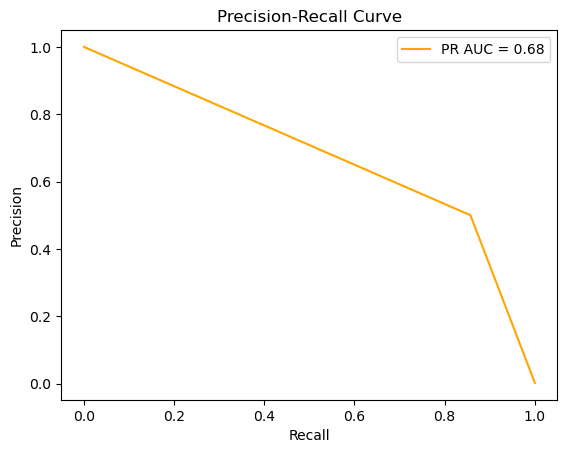

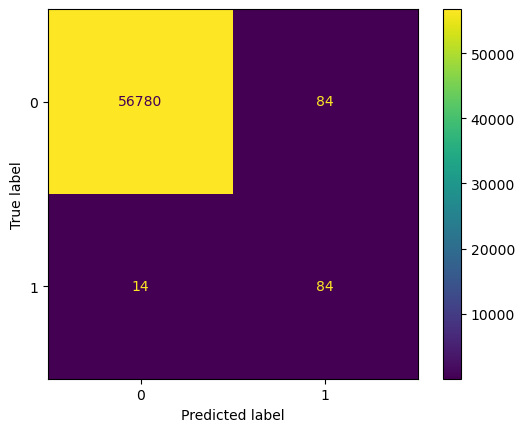

In [18]:
knn_clf, f1_score_knn, accuracy_knn, roc_auc_knn, pr_auc_knn, tt_knn = run_model(knn_clf, X_train_smt, y_train_smt, X_test, y_test)

## LogisticRegression

F1 Score  = 0.6951219512195121
Accuracy = 0.9991222218320986
ROC Area under Curve = 0.7907371903460314
Area under Precision-Recall Curve = 0.7229943973976337
Time taken = 4.602836608886719
              precision    recall  f1-score   support

           0    0.99928   0.99984   0.99956     56864
           1    0.86364   0.58163   0.69512        98

    accuracy                        0.99912     56962
   macro avg    0.93146   0.79074   0.84734     56962
weighted avg    0.99905   0.99912   0.99904     56962



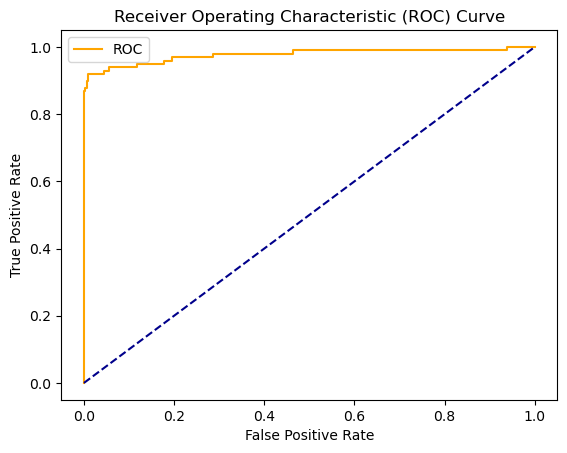

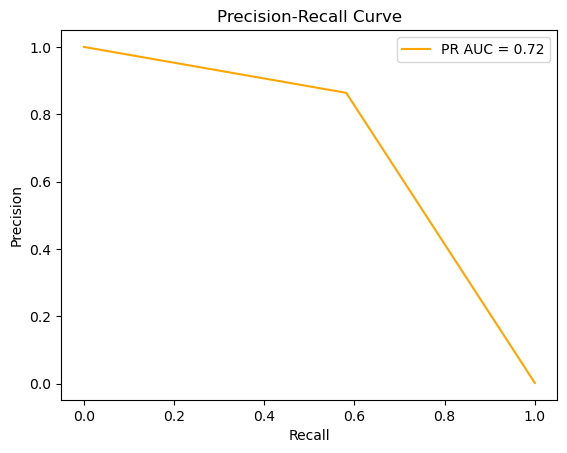

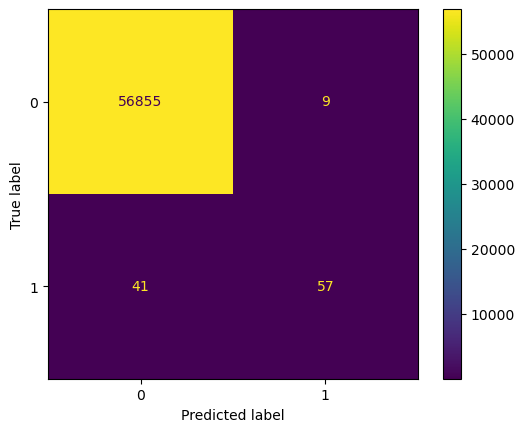

In [19]:
params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lrsmt = LogisticRegression(**params_lr)

model_lrsmt,f1_score_lrsmt,accuracy_lrsmt, roc_auc_lrsmt, pr_auc_lrsmt, tt_lrsmt = run_model(model_lrsmt, X_train, y_train, X_test, y_test)
     

## LogisticRegression + SMOTE

F1 Score  = 0.10606953447259869
Accuracy = 0.9733682103858713
ROC Area under Curve = 0.9459151731880147
Area under Precision-Recall Curve = 0.4873964848410188
Time taken = 10.161261320114136
              precision    recall  f1-score   support

           0    0.99986   0.97346   0.98648     56864
           1    0.05629   0.91837   0.10607        98

    accuracy                        0.97337     56962
   macro avg    0.52807   0.94592   0.54628     56962
weighted avg    0.99823   0.97337   0.98497     56962



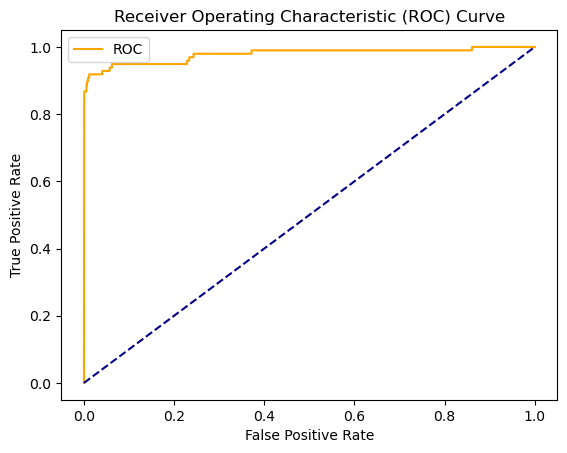

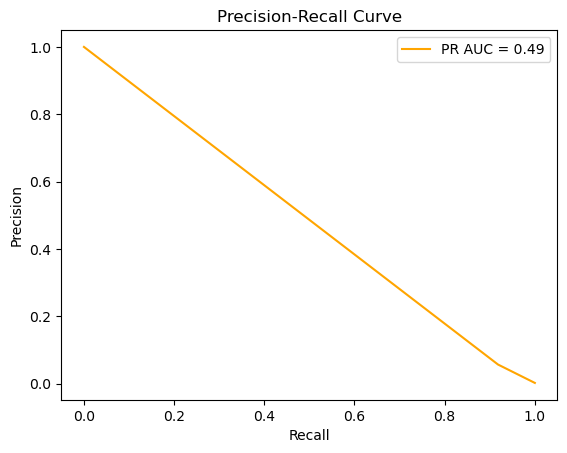

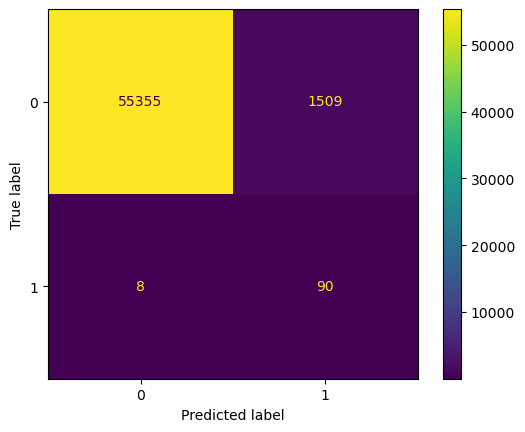

In [20]:
model_lrsmt,f1_score_lrsmt,accuracy_lrsmt, roc_auc_lrsmt, pr_auc_lrsmt, tt_lrsmt = run_model(model_lrsmt, X_train_smt, y_train_smt, X_test, y_test)

## RandomForest

F1 Score  = 0.8750000000000001
Accuracy = 0.9996137776061234
ROC Area under Curve = 0.892848349947745
Area under Precision-Recall Curve = 0.8866312198621458
Time taken = 454.7529892921448
              precision    recall  f1-score   support

           0    0.99963   0.99998   0.99981     56864
           1    0.98718   0.78571   0.87500        98

    accuracy                        0.99961     56962
   macro avg    0.99341   0.89285   0.93740     56962
weighted avg    0.99961   0.99961   0.99959     56962



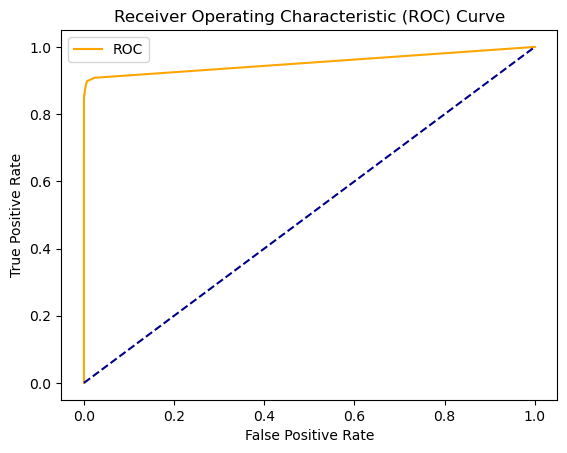

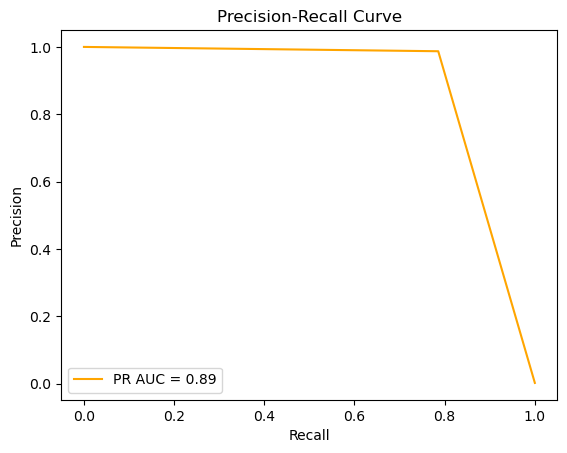

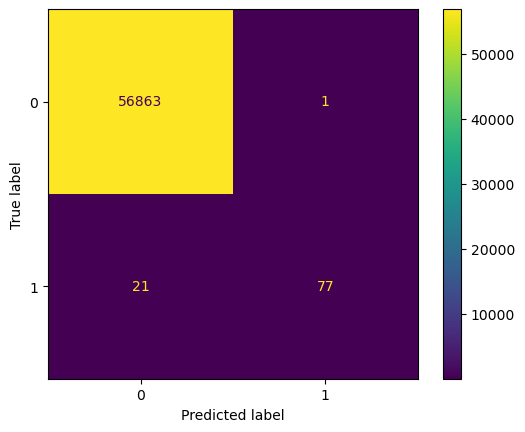

In [21]:
from sklearn.ensemble import RandomForestClassifier

model_rfsmt = RandomForestClassifier()
model_rfsmt,f1_score_rfsmt,accuracy_rfsmt, roc_auc_rfsmt, pr_auc_rfsmt, tt_rfsmt = run_model(model_rfsmt, X_train, y_train, X_test, y_test)
     

## RandomForest + SMOTE

F1 Score  = 0.8783068783068784
Accuracy = 0.9995962220427653
ROC Area under Curve = 0.9233990444799192
Area under Precision-Recall Curve = 0.8796450105242433
Time taken = 853.4276304244995
              precision    recall  f1-score   support

           0    0.99974   0.99986   0.99980     56864
           1    0.91209   0.84694   0.87831        98

    accuracy                        0.99960     56962
   macro avg    0.95591   0.92340   0.93905     56962
weighted avg    0.99959   0.99960   0.99959     56962



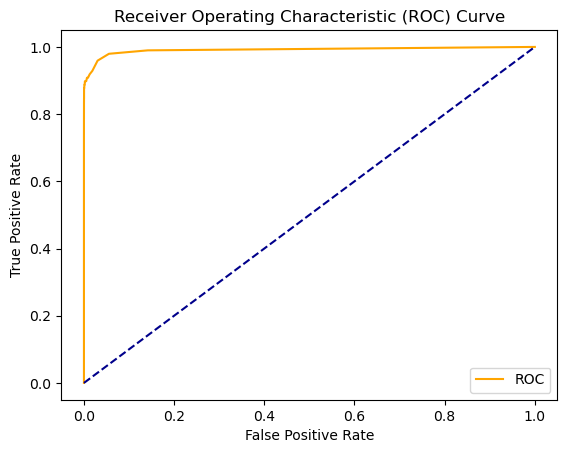

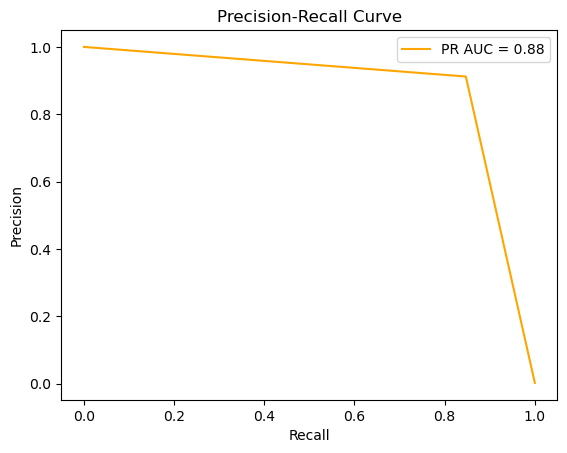

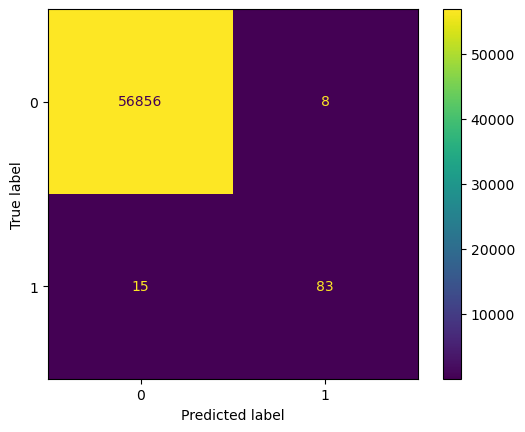

In [22]:
from sklearn.ensemble import RandomForestClassifier

model_rfsmt = RandomForestClassifier()
model_rfsmt, f1_score_rfsmt, accuracy_rfsmt, roc_auc_rfsmt, pr_auc_rfsmt, tt_rfsmt = run_model(model_rfsmt, X_train_smt, y_train_smt, X_test, y_test)
     

### DecisionTree 

F1 Score  = 0.7752808988764046
Accuracy = 0.9992977774656788
ROC Area under Curve = 0.8519440943231541
Area under Precision-Recall Curve = 0.7835453719952221
Time taken = 4.824998140335083
              precision    recall  f1-score   support

           0    0.99949   0.99981   0.99965     56864
           1    0.86250   0.70408   0.77528        98

    accuracy                        0.99930     56962
   macro avg    0.93100   0.85194   0.88746     56962
weighted avg    0.99925   0.99930   0.99926     56962



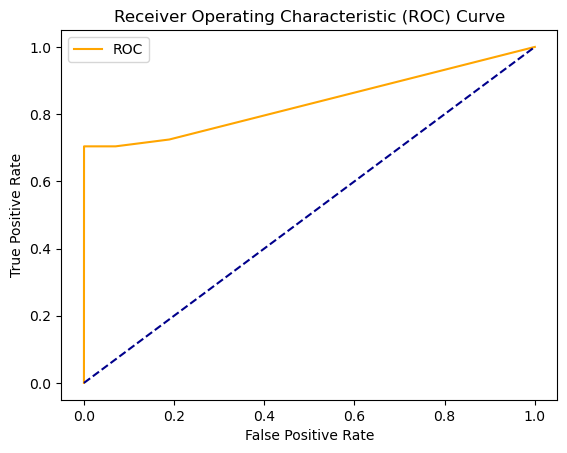

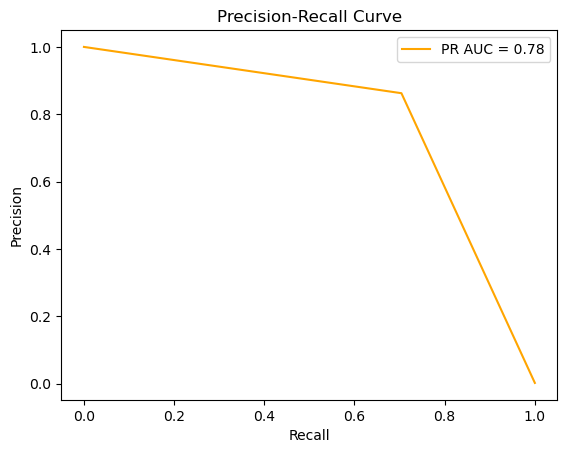

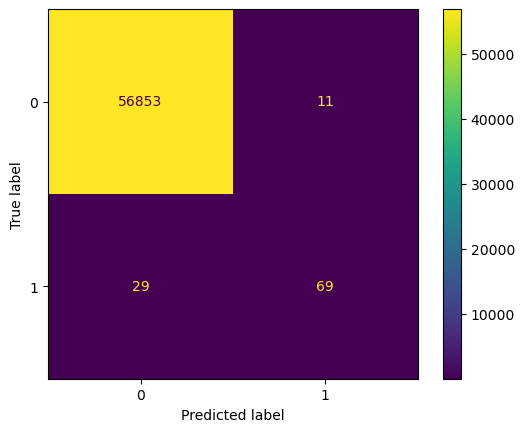

In [23]:
from sklearn.tree import DecisionTreeClassifier
params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dtsmt = DecisionTreeClassifier(**params_dt)
model_dtsmt, f1_score_dtsmt, accuracy_dtsmt, roc_auc_dtsmt, pr_auc_dtsmt, tt_dtsmt = run_model(model_dtsmt, X_train, y_train, X_test,y_test)

### DecisionTree + SMOTE

F1 Score  = 0.2836879432624113
Accuracy = 0.9929075524033566
ROC Area under Curve = 0.9047692022785478
Area under Precision-Recall Curve = 0.4941581752475893
Time taken = 10.216243743896484
              precision    recall  f1-score   support

           0    0.99968   0.99321   0.99644     56864
           1    0.17167   0.81633   0.28369        98

    accuracy                        0.99291     56962
   macro avg    0.58568   0.90477   0.64006     56962
weighted avg    0.99826   0.99291   0.99521     56962



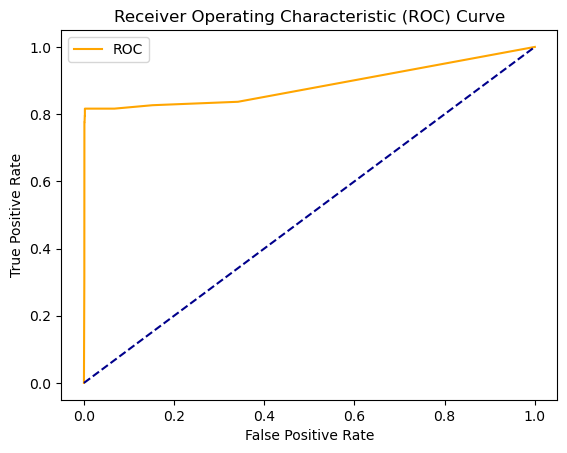

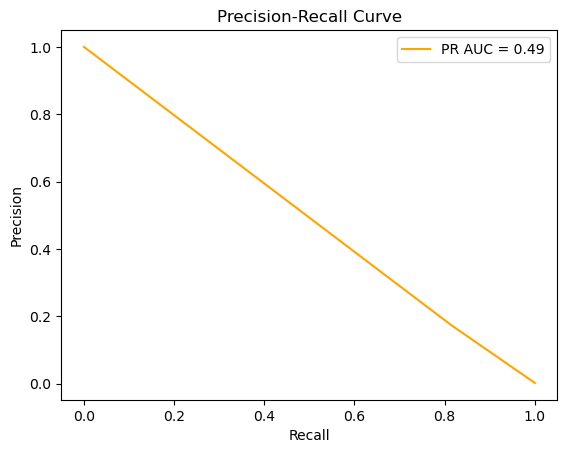

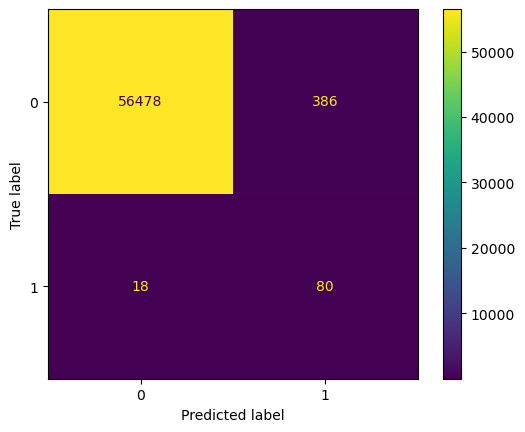

In [24]:
model_dtsmt, f1_score_dtsmt, accuracy_dtsmt, roc_auc_dtsmt, pr_auc_dtsmt, tt_dtsmt = run_model(model_dtsmt, X_train_smt, y_train_smt, X_test,y_test)

### XGBoost

F1 Score  = 0.8474576271186441
Accuracy = 0.9995259997893332
ROC Area under Curve = 0.8826178895868984
Area under Precision-Recall Curve = 0.8575384945069046
Time taken = 0.6783580780029297
              precision    recall  f1-score   support

           0    0.99960   0.99993   0.99976     56864
           1    0.94937   0.76531   0.84746        98

    accuracy                        0.99953     56962
   macro avg    0.97448   0.88262   0.92361     56962
weighted avg    0.99951   0.99953   0.99950     56962



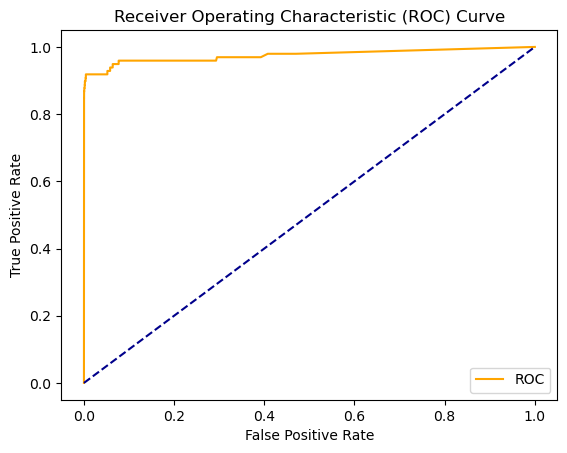

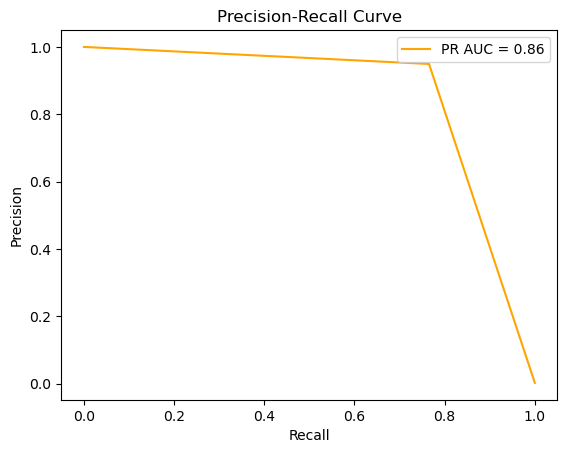

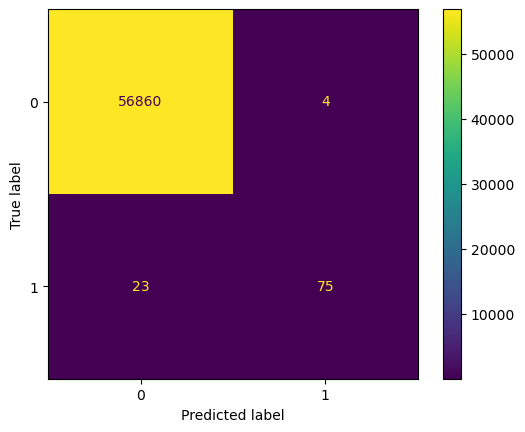

In [25]:
params_xgb ={'n_estimators': 20,
            'max_depth': 16}

model_xgbsmt = xgb.XGBClassifier(**params_xgb)
model_xgbsmt, f1_score_xgbsmt, accuracy_xgbsmt, roc_auc_xgbsmt, pr_auc_xgbsmt, tt_xgbsmt = run_model(model_xgbsmt, X_train, y_train, X_test, y_test)
     

### XGBoost + SMOTE

F1 Score  = 0.803921568627451
Accuracy = 0.9992977774656788
ROC Area under Curve = 0.9181563171132269
Area under Precision-Recall Curve = 0.8053002442758285
Time taken = 2.1530675888061523
              precision    recall  f1-score   support

           0    0.99972   0.99958   0.99965     56864
           1    0.77358   0.83673   0.80392        98

    accuracy                        0.99930     56962
   macro avg    0.88665   0.91816   0.90178     56962
weighted avg    0.99933   0.99930   0.99931     56962



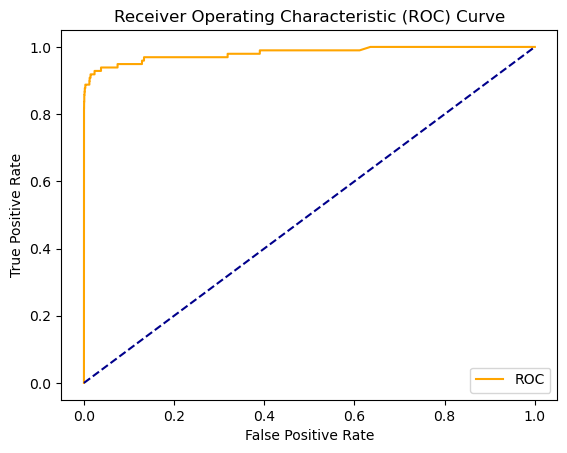

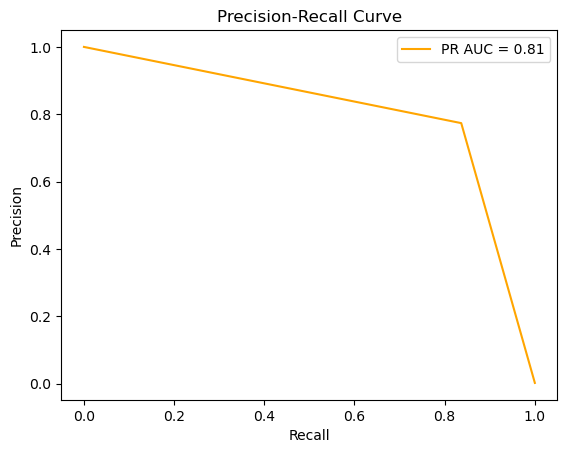

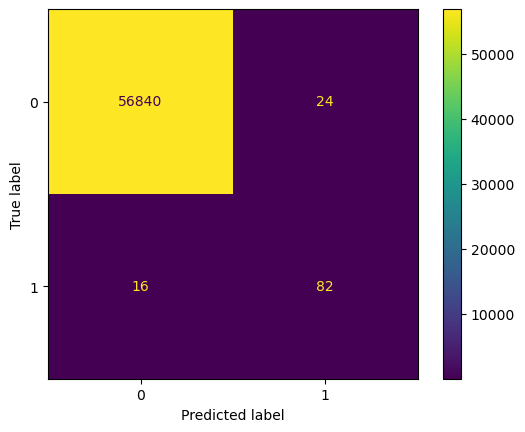

In [26]:
model_xgbsmt, f1_score_xgbsmt, accuracy_xgbsmt, roc_auc_xgbsmt, pr_auc_xgbsmt, tt_xgbsmt = run_model(model_xgbsmt, X_train_smt, y_train_smt, X_test, y_test)


### CatBoost

Learning rate set to 0.5
0:	learn: 0.0369020	total: 6.35s	remaining: 2m
1:	learn: 0.0080196	total: 12.1s	remaining: 1m 49s
2:	learn: 0.0046350	total: 17.9s	remaining: 1m 41s
3:	learn: 0.0035516	total: 23.7s	remaining: 1m 34s
4:	learn: 0.0027589	total: 29.5s	remaining: 1m 28s
5:	learn: 0.0022880	total: 35.3s	remaining: 1m 22s
6:	learn: 0.0019234	total: 41s	remaining: 1m 16s
7:	learn: 0.0016352	total: 46.7s	remaining: 1m 9s
8:	learn: 0.0014243	total: 52.5s	remaining: 1m 4s
9:	learn: 0.0012724	total: 58.2s	remaining: 58.2s
10:	learn: 0.0010896	total: 1m 3s	remaining: 52.2s
11:	learn: 0.0009375	total: 1m 9s	remaining: 46.4s
12:	learn: 0.0008584	total: 1m 15s	remaining: 40.5s
13:	learn: 0.0007711	total: 1m 20s	remaining: 34.6s
14:	learn: 0.0006864	total: 1m 26s	remaining: 28.8s
15:	learn: 0.0006189	total: 1m 32s	remaining: 23s
16:	learn: 0.0005767	total: 1m 37s	remaining: 17.2s
17:	learn: 0.0005236	total: 1m 43s	remaining: 11.5s
18:	learn: 0.0004846	total: 1m 48s	remaining: 5.74s
19:	learn:

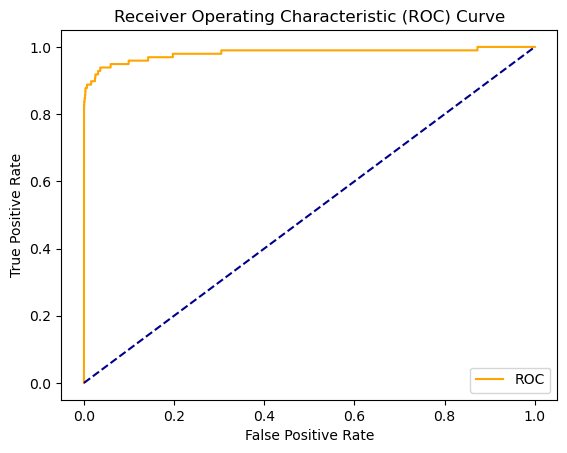

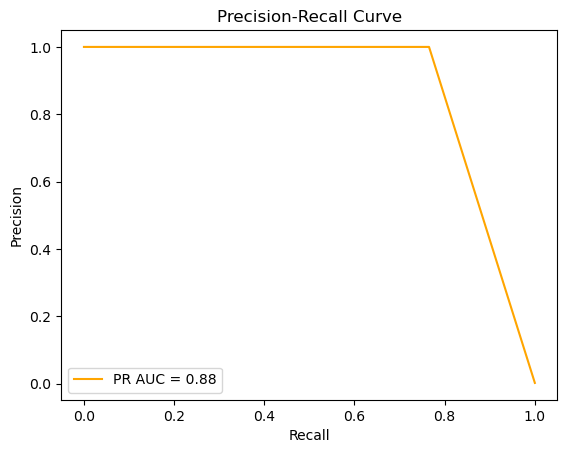

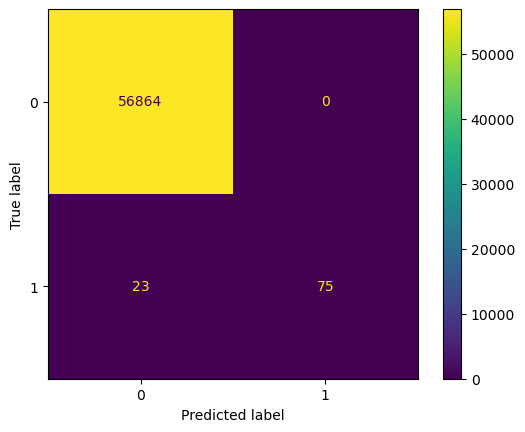

In [27]:
params_cb ={'iterations': 20,
            'max_depth': 16}

model_cbsmt = cb.CatBoostClassifier(**params_cb)
model_cbsmt, f1_score_cbsmt, accuracy_cbsmt, roc_auc_cbsmt , pr_auc_cbsmt, tt_cbsmt = run_model(model_cbsmt, X_train, y_train, X_test, y_test)

### CatBoost + SMOTE

Learning rate set to 0.5
0:	learn: 0.0975298	total: 6.02s	remaining: 1m 54s
1:	learn: 0.0363889	total: 12.2s	remaining: 1m 49s
2:	learn: 0.0194832	total: 18s	remaining: 1m 42s
3:	learn: 0.0124032	total: 23.9s	remaining: 1m 35s
4:	learn: 0.0083280	total: 29.8s	remaining: 1m 29s
5:	learn: 0.0062781	total: 35.7s	remaining: 1m 23s
6:	learn: 0.0048889	total: 41.7s	remaining: 1m 17s
7:	learn: 0.0039153	total: 47.4s	remaining: 1m 11s
8:	learn: 0.0029614	total: 53.2s	remaining: 1m 5s
9:	learn: 0.0025821	total: 58.9s	remaining: 58.9s
10:	learn: 0.0021710	total: 1m 4s	remaining: 53.1s
11:	learn: 0.0018192	total: 1m 10s	remaining: 47.1s
12:	learn: 0.0016379	total: 1m 16s	remaining: 41.1s
13:	learn: 0.0014651	total: 1m 22s	remaining: 35.2s
14:	learn: 0.0013165	total: 1m 28s	remaining: 29.4s
15:	learn: 0.0011150	total: 1m 34s	remaining: 23.6s
16:	learn: 0.0009916	total: 1m 39s	remaining: 17.6s
17:	learn: 0.0009430	total: 1m 45s	remaining: 11.7s
18:	learn: 0.0008855	total: 1m 51s	remaining: 5.86s
19

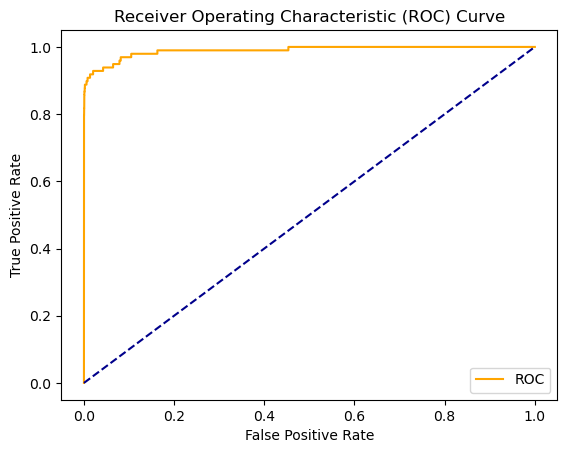

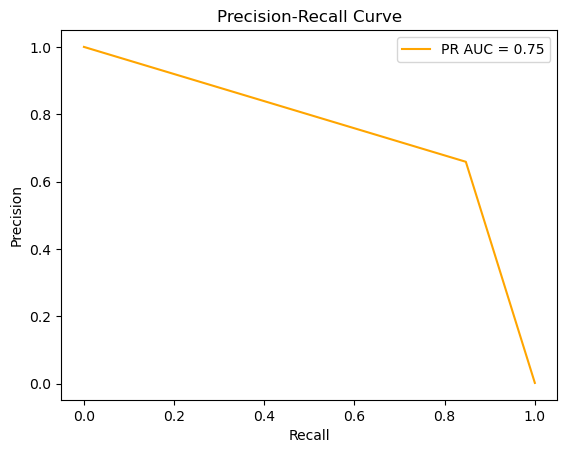

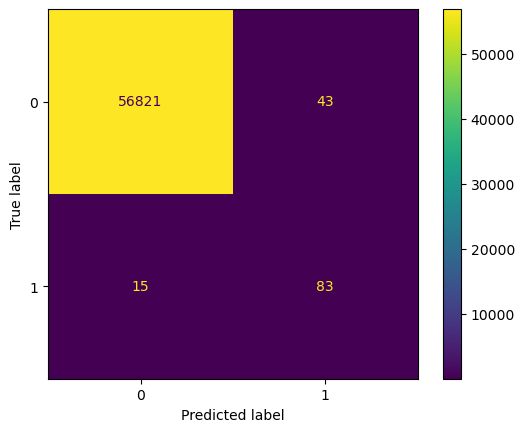

In [28]:
model_cbsmt, f1_score_cbsmt, accuracy_cbsmt, roc_auc_cbsmt , pr_auc_cbsmt, tt_cbsmt= run_model(model_cbsmt, X_train_smt, y_train_smt, X_test, y_test)

### Adaboost 

F1 Score  = 0.8022598870056498
Accuracy = 0.999385555282469
ROC Area under Curve = 0.8621745546840007
Area under Precision-Recall Curve = 0.8118489866721119
Time taken = 253.920752286911
              precision    recall  f1-score   support

           0    0.99953   0.99986   0.99969     56864
           1    0.89873   0.72449   0.80226        98

    accuracy                        0.99939     56962
   macro avg    0.94913   0.86217   0.90098     56962
weighted avg    0.99935   0.99939   0.99935     56962



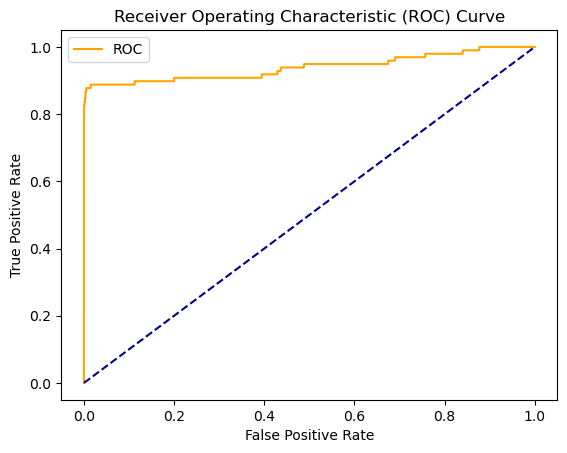

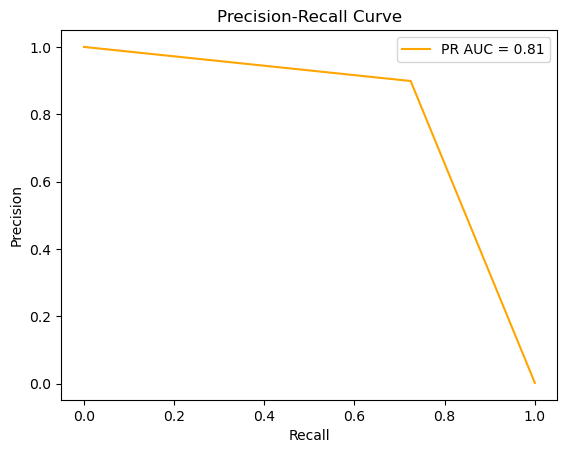

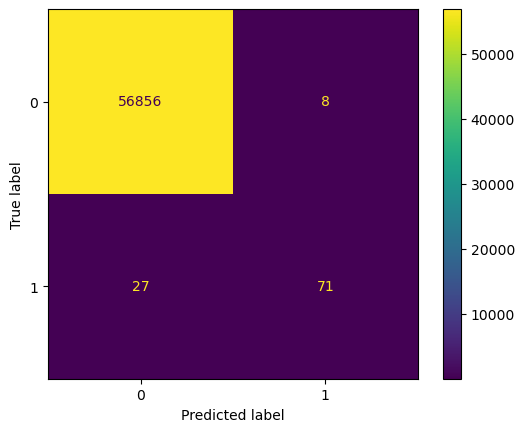

In [29]:
from sklearn.ensemble import AdaBoostClassifier
model_adasmt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                                  n_estimators=50,
                                  algorithm="SAMME.R",
                                  learning_rate=0.5)
model_adasmt, f1_score_adasmt, accuracy_adasmt, roc_auc_adasmt, pr_auc_adasmt, tt_adasmt = run_model(model_adasmt, X_train, y_train, X_test, y_test)

### Adaboost + SMOTE

F1 Score  = 0.20899149453219928
Accuracy = 0.9885713282539237
ROC Area under Curve = 0.933156841098848
Area under Precision-Recall Curve = 0.49819118841181603
Time taken = 538.6777105331421
              precision    recall  f1-score   support

           0    0.99979   0.98876   0.99424     56864
           1    0.11862   0.87755   0.20899        98

    accuracy                        0.98857     56962
   macro avg    0.55920   0.93316   0.60162     56962
weighted avg    0.99827   0.98857   0.99289     56962



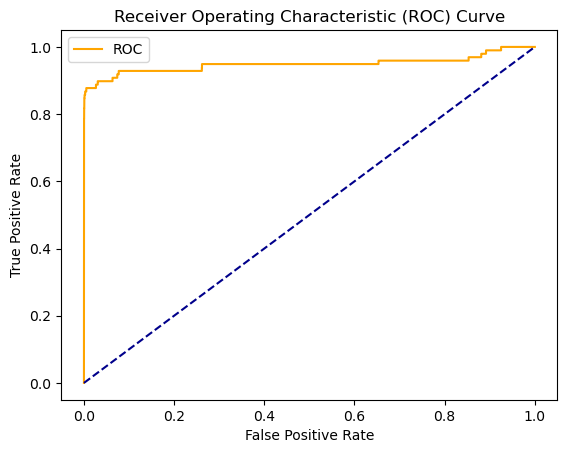

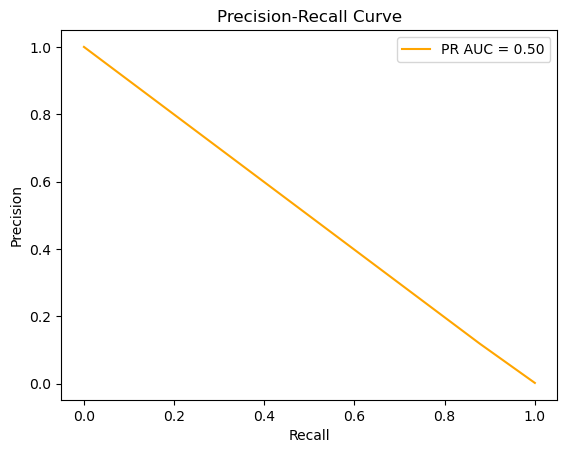

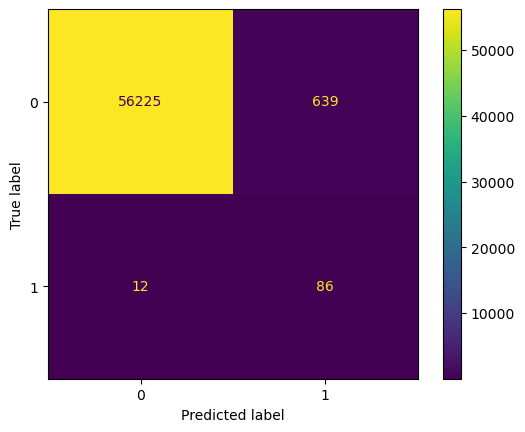

In [30]:
model_adasmt, f1_score_adasmt, accuracy_adasmt, roc_auc_adasmt, pr_auc_adasmt, tt_adasmt = run_model(model_adasmt, X_train_smt, y_train_smt, X_test, y_test)

## Model Selection (SMOTE)

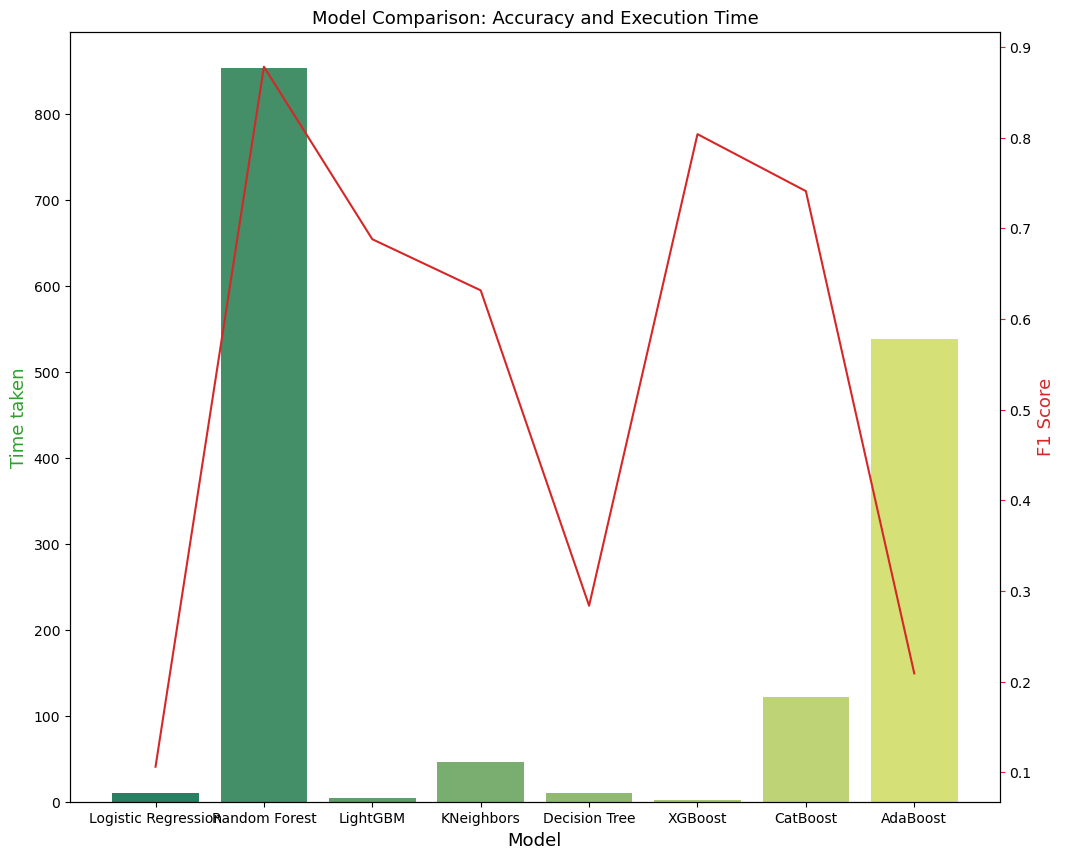

In [31]:
accuracy_scores = [accuracy_lrsmt, accuracy_rfsmt, accuracy_lgbsmt, accuracy_knn, accuracy_dtsmt, accuracy_xgbsmt, accuracy_cbsmt, accuracy_adasmt]
roc_auc_scores = [roc_auc_lrsmt, roc_auc_rfsmt, roc_auc_lgbsmt, roc_auc_knn, roc_auc_dtsmt, roc_auc_xgbsmt, roc_auc_cbsmt, roc_auc_adasmt]
f1_scores = [f1_score_lrsmt, f1_score_rfsmt, f1_score_lgbsmt, f1_score_knn, f1_score_dtsmt, f1_score_xgbsmt, f1_score_cbsmt, f1_score_adasmt]
tt = [tt_lrsmt, tt_rfsmt, tt_lgbsmt, tt_knn, tt_dtsmt, tt_xgbsmt, tt_cbsmt, tt_adasmt]

model_data = {'Model': ['Logistic Regression','Random Forest','LightGBM','KNeighbors', 'Decision Tree', 'XGBoost', 'CatBoost', 'AdaBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'F1 Score': f1_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Execution Time', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('F1 Score', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='F1 Score', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

### Mô hình Random Forest mang lại kết quả tốt nhất với chỉ số F1_score, nhưng thời gian huấn luyện dài và tốn nhiều tài nguyên tính toán. Do đó chúng ta sẽ chọn mô hình LightGBM để tinh chỉnh và tối ưu hóa.

## Fine Tuning (Optuna)

In [32]:
import optuna  # pip install optuna
import lightgbm as lgb
from sklearn.metrics import make_scorer

def objective(trial, X_train_smt, y_train_smt):
    max_depth=trial.suggest_int('max_depth',2,14)
    param_grid = {
        #         "device_type": trial.suggest_categorical("device_type", ['gpu']),
        #"n_estimators": trial.suggest_categorical("n_estimators", 1,300 ),
        "learning_rate": trial.suggest_float("learning_rate", 0.0001, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 4, 2**max_depth),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 5, 500),
        "max_bin": trial.suggest_int("max_bin", 10, 300),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.2, 0.95, step=0.1)
    }


    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    model = lgb.LGBMClassifier(**param_grid)
    model.fit(X_train_smt,y_train_smt)
    scores = cross_val_score(model, X_train_smt, y_train_smt,
                             scoring=make_scorer(f1_score, average='weighted', labels=[1]),cv=cv, n_jobs=-1)
    return np.mean(scores)

### Luyện với nhiều trial để tìm ra hyperparameter tốt nhất

In [33]:
study = optuna.create_study(direction='maximize')
func = lambda trial: objective(trial, X_train_smt, y_train_smt)
study.optimize(func, n_trials=100)

[I 2024-03-11 13:31:25,060] A new study created in memory with name: no-name-fc72d4fe-18e6-4688-81b5-72a762b29aa7


[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_gain_to_split is set=12.854329672819501, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.854329672819501
[LightGBM] [Warning] lambda_l1 is set=45, reg_alpha=0.0 will be ignored. Current value: lambda_l1=45
[LightGBM] [Warning] lambda_l2 is set=55, reg_lambda=0.0 will be ignored. Current value: lambda_l2=55
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_da

[I 2024-03-11 13:31:37,270] Trial 0 finished with value: 0.9907342866798163 and parameters: {'max_depth': 10, 'learning_rate': 0.29113700840157797, 'num_leaves': 396, 'min_data_in_leaf': 18, 'max_bin': 274, 'lambda_l1': 45, 'lambda_l2': 55, 'min_gain_to_split': 12.854329672819501, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 0 with value: 0.9907342866798163.


[LightGBM] [Warning] min_data_in_leaf is set=458, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=458
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=1.5303981384156173, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.5303981384156173
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=85, reg_lambda=0.0 will be ignored. Current value: lambda_l2=85
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=458, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=458
[LightGBM] [Warnin

[I 2024-03-11 13:31:48,543] Trial 1 finished with value: 0.9599292674010144 and parameters: {'max_depth': 5, 'learning_rate': 0.004944556695372179, 'num_leaves': 18, 'min_data_in_leaf': 458, 'max_bin': 296, 'lambda_l1': 5, 'lambda_l2': 85, 'min_gain_to_split': 1.5303981384156173, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 0 with value: 0.9907342866798163.


[LightGBM] [Warning] min_data_in_leaf is set=255, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=255
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=8.163304738163767, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.163304738163767
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=255, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=255
[LightGBM] [Warning] feature_fraction is set=0.7

[I 2024-03-11 13:31:56,836] Trial 2 finished with value: 0.9913744727936077 and parameters: {'max_depth': 5, 'learning_rate': 0.15430952659309455, 'num_leaves': 8, 'min_data_in_leaf': 255, 'max_bin': 98, 'lambda_l1': 50, 'lambda_l2': 10, 'min_gain_to_split': 8.163304738163767, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 2 with value: 0.9913744727936077.


[LightGBM] [Warning] min_data_in_leaf is set=258, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=258
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=7.407629452497272, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.407629452497272
[LightGBM] [Warning] lambda_l1 is set=90, reg_alpha=0.0 will be ignored. Current value: lambda_l1=90
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=258, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=258
[LightGBM] [Warning] feature_fraction is set=0.5

[I 2024-03-11 13:32:04,319] Trial 3 finished with value: 0.9806289548472332 and parameters: {'max_depth': 14, 'learning_rate': 0.16406923702761453, 'num_leaves': 4175, 'min_data_in_leaf': 258, 'max_bin': 67, 'lambda_l1': 90, 'lambda_l2': 50, 'min_gain_to_split': 7.407629452497272, 'bagging_fraction': 0.2, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 2 with value: 0.9913744727936077.


[LightGBM] [Warning] min_data_in_leaf is set=301, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=301
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=8.119451512190015, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.119451512190015
[LightGBM] [Warning] lambda_l1 is set=45, reg_alpha=0.0 will be ignored. Current value: lambda_l1=45
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=301, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=301
[LightGBM] [Warning] feature_fraction is set=0.9

[I 2024-03-11 13:32:13,441] Trial 4 finished with value: 0.9855992062767575 and parameters: {'max_depth': 11, 'learning_rate': 0.05665429312396115, 'num_leaves': 1574, 'min_data_in_leaf': 301, 'max_bin': 77, 'lambda_l1': 45, 'lambda_l2': 45, 'min_gain_to_split': 8.119451512190015, 'bagging_fraction': 0.2, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 2 with value: 0.9913744727936077.


[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=6.8002297656039, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.8002297656039
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=70, reg_lambda=0.0 will be ignored. Current value: lambda_l2=70
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] feature_f

[I 2024-03-11 13:32:22,807] Trial 5 finished with value: 0.9979427286426044 and parameters: {'max_depth': 10, 'learning_rate': 0.2917974553308091, 'num_leaves': 80, 'min_data_in_leaf': 8, 'max_bin': 54, 'lambda_l1': 10, 'lambda_l2': 70, 'min_gain_to_split': 6.8002297656039, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 5 with value: 0.9979427286426044.


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=7.788458584245416, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.788458584245416
[LightGBM] [Warning] lambda_l1 is set=65, reg_alpha=0.0 will be ignored. Current value: lambda_l1=65
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning]

[I 2024-03-11 13:32:30,900] Trial 6 finished with value: 0.970440092872396 and parameters: {'max_depth': 5, 'learning_rate': 0.1313473741711211, 'num_leaves': 4, 'min_data_in_leaf': 30, 'max_bin': 156, 'lambda_l1': 65, 'lambda_l2': 100, 'min_gain_to_split': 7.788458584245416, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 5 with value: 0.9979427286426044.


[LightGBM] [Warning] min_data_in_leaf is set=367, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=367
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_gain_to_split is set=8.38542623377726, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.38542623377726
[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=367, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=367
[LightGBM] [Warning] feature_fraction is set=0.2

[I 2024-03-11 13:32:39,300] Trial 7 finished with value: 0.9751677764193853 and parameters: {'max_depth': 8, 'learning_rate': 0.13077649406230826, 'num_leaves': 32, 'min_data_in_leaf': 367, 'max_bin': 284, 'lambda_l1': 100, 'lambda_l2': 45, 'min_gain_to_split': 8.38542623377726, 'bagging_fraction': 0.2, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 5 with value: 0.9979427286426044.


[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=7.576468134138232, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.576468134138232
[LightGBM] [Warning] lambda_l1 is set=75, reg_alpha=0.0 will be ignored. Current value: lambda_l1=75
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warnin

[I 2024-03-11 13:32:49,684] Trial 8 finished with value: 0.9927810004243531 and parameters: {'max_depth': 5, 'learning_rate': 0.07871392899961153, 'num_leaves': 31, 'min_data_in_leaf': 500, 'max_bin': 26, 'lambda_l1': 75, 'lambda_l2': 40, 'min_gain_to_split': 7.576468134138232, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 5 with value: 0.9979427286426044.


[LightGBM] [Warning] min_data_in_leaf is set=149, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=149
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=12.69679419333864, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.69679419333864
[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] lambda_l2 is set=65, reg_lambda=0.0 will be ignored. Current value: lambda_l2=65
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=149, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=149
[LightGBM] [Wa

[I 2024-03-11 13:32:59,024] Trial 9 finished with value: 0.9680152155956749 and parameters: {'max_depth': 10, 'learning_rate': 0.03631004963013423, 'num_leaves': 309, 'min_data_in_leaf': 149, 'max_bin': 12, 'lambda_l1': 100, 'lambda_l2': 65, 'min_gain_to_split': 12.69679419333864, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 5 with value: 0.9979427286426044.


[LightGBM] [Warning] min_data_in_leaf is set=119, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=119
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_gain_to_split is set=2.6512099588939115, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.6512099588939115
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=119, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=119
[LightGBM] [Warning] feature_fraction is set=0.4, 

[I 2024-03-11 13:33:06,424] Trial 10 finished with value: 0.9882514192178146 and parameters: {'max_depth': 2, 'learning_rate': 0.2996736201628838, 'num_leaves': 4, 'min_data_in_leaf': 119, 'max_bin': 158, 'lambda_l1': 0, 'lambda_l2': 0, 'min_gain_to_split': 2.6512099588939115, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 5 with value: 0.9979427286426044.


[LightGBM] [Warning] min_data_in_leaf is set=480, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=480
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=5.380974076616607, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.380974076616607
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=480, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=480
[LightGBM] [Warnin

[I 2024-03-11 13:33:16,429] Trial 11 finished with value: 0.9978242924036824 and parameters: {'max_depth': 7, 'learning_rate': 0.2229059732335555, 'num_leaves': 63, 'min_data_in_leaf': 480, 'max_bin': 22, 'lambda_l1': 20, 'lambda_l2': 20, 'min_gain_to_split': 5.380974076616607, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 5 with value: 0.9979427286426044.


[LightGBM] [Warning] min_data_in_leaf is set=396, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=396
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=4.130725103371863, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.130725103371863
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=396, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=396
[LightGBM] [Warning] feature_fraction is set=0.9

[I 2024-03-11 13:33:27,572] Trial 12 finished with value: 0.9985595887400335 and parameters: {'max_depth': 8, 'learning_rate': 0.26154915147604335, 'num_leaves': 89, 'min_data_in_leaf': 396, 'max_bin': 116, 'lambda_l1': 20, 'lambda_l2': 25, 'min_gain_to_split': 4.130725103371863, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 12 with value: 0.9985595887400335.


[LightGBM] [Warning] min_data_in_leaf is set=381, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=381
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=4.238558256201638, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.238558256201638
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=381, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=381
[LightGBM] [Warning] feature_fraction is set=0.9

[I 2024-03-11 13:33:41,532] Trial 13 finished with value: 0.998609977277544 and parameters: {'max_depth': 13, 'learning_rate': 0.23765041724683655, 'num_leaves': 6862, 'min_data_in_leaf': 381, 'max_bin': 116, 'lambda_l1': 25, 'lambda_l2': 25, 'min_gain_to_split': 4.238558256201638, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 13 with value: 0.998609977277544.


[LightGBM] [Warning] min_data_in_leaf is set=392, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=392
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=3.7536967429559343, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.7536967429559343
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=392, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=392
[LightGBM] [Warning] feature_fraction is set=0

[I 2024-03-11 13:34:01,356] Trial 14 finished with value: 0.9987044768106739 and parameters: {'max_depth': 14, 'learning_rate': 0.23085308989172162, 'num_leaves': 12795, 'min_data_in_leaf': 392, 'max_bin': 216, 'lambda_l1': 25, 'lambda_l2': 20, 'min_gain_to_split': 3.7536967429559343, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 14 with value: 0.9987044768106739.


[LightGBM] [Warning] min_data_in_leaf is set=364, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=364
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.240029272058067, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.240029272058067
[LightGBM] [Warning] lambda_l1 is set=30, reg_alpha=0.0 will be ignored. Current value: lambda_l1=30
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=364, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=364
[LightGBM] [Warning] feature_fraction is set=0.8

[I 2024-03-11 13:34:26,018] Trial 15 finished with value: 0.9991872833249353 and parameters: {'max_depth': 14, 'learning_rate': 0.2136064814971625, 'num_leaves': 13634, 'min_data_in_leaf': 364, 'max_bin': 216, 'lambda_l1': 30, 'lambda_l2': 30, 'min_gain_to_split': 0.240029272058067, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 15 with value: 0.9991872833249353.


[LightGBM] [Warning] min_data_in_leaf is set=323, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=323
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.16574850264459684, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.16574850264459684
[LightGBM] [Warning] lambda_l1 is set=35, reg_alpha=0.0 will be ignored. Current value: lambda_l1=35
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=323, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=323
[LightGBM] [Warning] feature_fraction is set

[I 2024-03-11 13:34:46,834] Trial 16 finished with value: 0.9991785027374191 and parameters: {'max_depth': 13, 'learning_rate': 0.19788724741938765, 'num_leaves': 8185, 'min_data_in_leaf': 323, 'max_bin': 218, 'lambda_l1': 35, 'lambda_l2': 30, 'min_gain_to_split': 0.16574850264459684, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 15 with value: 0.9991872833249353.


[LightGBM] [Warning] min_data_in_leaf is set=310, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=310
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.12694232901621338, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.12694232901621338
[LightGBM] [Warning] lambda_l1 is set=35, reg_alpha=0.0 will be ignored. Current value: lambda_l1=35
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=310, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=310
[LightGBM] [Warning] feature_fraction is set

[I 2024-03-11 13:35:06,353] Trial 17 finished with value: 0.9991499718235731 and parameters: {'max_depth': 12, 'learning_rate': 0.18802046545985218, 'num_leaves': 4042, 'min_data_in_leaf': 310, 'max_bin': 226, 'lambda_l1': 35, 'lambda_l2': 30, 'min_gain_to_split': 0.12694232901621338, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 15 with value: 0.9991872833249353.


[LightGBM] [Warning] min_data_in_leaf is set=169, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=169
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.17478848663772784, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.17478848663772784
[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=169, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=169
[LightGBM] [Warning] feature_fraction is set=0

[I 2024-03-11 13:35:23,906] Trial 18 finished with value: 0.9987460204828194 and parameters: {'max_depth': 12, 'learning_rate': 0.19510490841083697, 'num_leaves': 4090, 'min_data_in_leaf': 169, 'max_bin': 199, 'lambda_l1': 60, 'lambda_l2': 0, 'min_gain_to_split': 0.17478848663772784, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 15 with value: 0.9991872833249353.


[LightGBM] [Warning] min_data_in_leaf is set=325, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=325
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=10.703060502360696, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.703060502360696
[LightGBM] [Warning] lambda_l1 is set=35, reg_alpha=0.0 will be ignored. Current value: lambda_l1=35
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=325, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=325
[LightGBM] [Warning] feature_fraction is set=0

[I 2024-03-11 13:35:42,783] Trial 19 finished with value: 0.998027911162788 and parameters: {'max_depth': 14, 'learning_rate': 0.19709999611221224, 'num_leaves': 13062, 'min_data_in_leaf': 325, 'max_bin': 243, 'lambda_l1': 35, 'lambda_l2': 35, 'min_gain_to_split': 10.703060502360696, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 15 with value: 0.9991872833249353.


[LightGBM] [Warning] min_data_in_leaf is set=441, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=441
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=14.885838055684642, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=14.885838055684642
[LightGBM] [Warning] lambda_l1 is set=35, reg_alpha=0.0 will be ignored. Current value: lambda_l1=35
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=441, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=441
[LightGBM] [Warning] feature_fraction is set=0

[I 2024-03-11 13:35:56,783] Trial 20 finished with value: 0.9972204152558259 and parameters: {'max_depth': 12, 'learning_rate': 0.10374252258981925, 'num_leaves': 3521, 'min_data_in_leaf': 441, 'max_bin': 181, 'lambda_l1': 35, 'lambda_l2': 10, 'min_gain_to_split': 14.885838055684642, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 15 with value: 0.9991872833249353.


[LightGBM] [Warning] min_data_in_leaf is set=324, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=324
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.18578596304452896, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.18578596304452896
[LightGBM] [Warning] lambda_l1 is set=35, reg_alpha=0.0 will be ignored. Current value: lambda_l1=35
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=324, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=324
[LightGBM] [Warning] feature_fraction is set

[I 2024-03-11 13:36:15,882] Trial 21 finished with value: 0.9991565684333557 and parameters: {'max_depth': 12, 'learning_rate': 0.18704402804898299, 'num_leaves': 2799, 'min_data_in_leaf': 324, 'max_bin': 237, 'lambda_l1': 35, 'lambda_l2': 35, 'min_gain_to_split': 0.18578596304452896, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 15 with value: 0.9991872833249353.


[LightGBM] [Warning] min_data_in_leaf is set=204, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=204
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=1.7801454280349729, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.7801454280349729
[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=204, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=204
[LightGBM] [Warning] feature_fraction is set=0

[I 2024-03-11 13:36:36,199] Trial 22 finished with value: 0.9986033229822032 and parameters: {'max_depth': 13, 'learning_rate': 0.17078911881350817, 'num_leaves': 7931, 'min_data_in_leaf': 204, 'max_bin': 256, 'lambda_l1': 55, 'lambda_l2': 60, 'min_gain_to_split': 1.7801454280349729, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 15 with value: 0.9991872833249353.


[LightGBM] [Warning] min_data_in_leaf is set=322, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=322
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=1.6190250221418752, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.6190250221418752
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=322, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=322
[LightGBM] [Warning] feature_fraction is set=0

[I 2024-03-11 13:36:51,144] Trial 23 finished with value: 0.9985991015236977 and parameters: {'max_depth': 13, 'learning_rate': 0.25681947207489586, 'num_leaves': 7820, 'min_data_in_leaf': 322, 'max_bin': 192, 'lambda_l1': 40, 'lambda_l2': 35, 'min_gain_to_split': 1.6190250221418752, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 15 with value: 0.9991872833249353.


[LightGBM] [Warning] min_data_in_leaf is set=351, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=351
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.07062409142580854, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.07062409142580854
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=351, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=351
[LightGBM] [Warning] feature_fraction is set

[I 2024-03-11 13:37:11,855] Trial 24 finished with value: 0.9994199999601566 and parameters: {'max_depth': 11, 'learning_rate': 0.20999080066230255, 'num_leaves': 1536, 'min_data_in_leaf': 351, 'max_bin': 241, 'lambda_l1': 15, 'lambda_l2': 15, 'min_gain_to_split': 0.07062409142580854, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 24 with value: 0.9994199999601566.


[LightGBM] [Warning] min_data_in_leaf is set=435, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=435
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=2.8068075306308096, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.8068075306308096
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=435, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=435
[LightGBM] [Warning] feature_fraction is set=0

[I 2024-03-11 13:37:25,552] Trial 25 finished with value: 0.9990160653848884 and parameters: {'max_depth': 11, 'learning_rate': 0.2140680117035948, 'num_leaves': 1319, 'min_data_in_leaf': 435, 'max_bin': 211, 'lambda_l1': 15, 'lambda_l2': 10, 'min_gain_to_split': 2.8068075306308096, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 24 with value: 0.9994199999601566.


[LightGBM] [Warning] min_data_in_leaf is set=280, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=280
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=5.416679507804531, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.416679507804531
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=280, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=280
[LightGBM] [Warnin

[I 2024-03-11 13:37:36,592] Trial 26 finished with value: 0.998243364082481 and parameters: {'max_depth': 11, 'learning_rate': 0.2608312256136419, 'num_leaves': 884, 'min_data_in_leaf': 280, 'max_bin': 259, 'lambda_l1': 25, 'lambda_l2': 15, 'min_gain_to_split': 5.416679507804531, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 24 with value: 0.9994199999601566.


[LightGBM] [Warning] min_data_in_leaf is set=356, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=356
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=1.4722603513718275, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.4722603513718275
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=356, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=356
[LightGBM] [Warning] feature_fraction is set=0

[I 2024-03-11 13:38:01,839] Trial 27 finished with value: 0.9991807170183689 and parameters: {'max_depth': 14, 'learning_rate': 0.13067752326262638, 'num_leaves': 15414, 'min_data_in_leaf': 356, 'max_bin': 175, 'lambda_l1': 10, 'lambda_l2': 25, 'min_gain_to_split': 1.4722603513718275, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 24 with value: 0.9994199999601566.


[LightGBM] [Warning] min_data_in_leaf is set=357, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=357
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=1.3960753088043856, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.3960753088043856
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=357, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=357
[LightGBM] [Warning] feature_fraction is set=0.9

[I 2024-03-11 13:38:23,078] Trial 28 finished with value: 0.9994814779356374 and parameters: {'max_depth': 9, 'learning_rate': 0.1300157580561876, 'num_leaves': 500, 'min_data_in_leaf': 357, 'max_bin': 176, 'lambda_l1': 0, 'lambda_l2': 15, 'min_gain_to_split': 1.3960753088043856, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 28 with value: 0.9994814779356374.


[LightGBM] [Warning] min_data_in_leaf is set=219, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=219
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=3.0124494738025605, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.0124494738025605
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=219, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=219
[LightGBM] [Warning]

[I 2024-03-11 13:38:43,396] Trial 29 finished with value: 0.9994419552949863 and parameters: {'max_depth': 9, 'learning_rate': 0.09646446512346533, 'num_leaves': 253, 'min_data_in_leaf': 219, 'max_bin': 266, 'lambda_l1': 0, 'lambda_l2': 5, 'min_gain_to_split': 3.0124494738025605, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 28 with value: 0.9994814779356374.


[LightGBM] [Warning] min_data_in_leaf is set=214, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=214
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=5.5437966641328185, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.5437966641328185
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=214, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=214
[LightGBM] [Warning]

[I 2024-03-11 13:39:01,738] Trial 30 finished with value: 0.9993760877902259 and parameters: {'max_depth': 9, 'learning_rate': 0.10044577973457838, 'num_leaves': 180, 'min_data_in_leaf': 214, 'max_bin': 269, 'lambda_l1': 0, 'lambda_l2': 0, 'min_gain_to_split': 5.5437966641328185, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 28 with value: 0.9994814779356374.


[LightGBM] [Warning] min_data_in_leaf is set=196, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=196
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=5.830600994868522, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.830600994868522
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=196, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=196
[LightGBM] [Warning] f

[I 2024-03-11 13:39:19,373] Trial 31 finished with value: 0.9993431425041607 and parameters: {'max_depth': 9, 'learning_rate': 0.0960182270492306, 'num_leaves': 172, 'min_data_in_leaf': 196, 'max_bin': 267, 'lambda_l1': 0, 'lambda_l2': 0, 'min_gain_to_split': 5.830600994868522, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 28 with value: 0.9994814779356374.


[LightGBM] [Warning] min_data_in_leaf is set=223, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=223
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=2.8803899030158115, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.8803899030158115
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=223, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=223
[LightGBM] [Warning] feature_fraction is set=0.9, 

[I 2024-03-11 13:39:38,549] Trial 32 finished with value: 0.9990929091583665 and parameters: {'max_depth': 7, 'learning_rate': 0.09522117246048065, 'num_leaves': 104, 'min_data_in_leaf': 223, 'max_bin': 292, 'lambda_l1': 5, 'lambda_l2': 5, 'min_gain_to_split': 2.8803899030158115, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 28 with value: 0.9994814779356374.


[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=1.3203250105221163, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.3203250105221163
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] f

[I 2024-03-11 13:39:59,288] Trial 33 finished with value: 0.9995363828438834 and parameters: {'max_depth': 9, 'learning_rate': 0.12148692618690446, 'num_leaves': 230, 'min_data_in_leaf': 93, 'max_bin': 299, 'lambda_l1': 0, 'lambda_l2': 15, 'min_gain_to_split': 1.3203250105221163, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=1.3138237610836196, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.3138237610836196
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] feature_fraction is set=0.9, 

[I 2024-03-11 13:40:15,434] Trial 34 finished with value: 0.9990775434198736 and parameters: {'max_depth': 9, 'learning_rate': 0.1479309751366285, 'num_leaves': 255, 'min_data_in_leaf': 68, 'max_bin': 297, 'lambda_l1': 10, 'lambda_l2': 15, 'min_gain_to_split': 1.3138237610836196, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_gain_to_split is set=2.3233998564147305, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.3233998564147305
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.4, co

[I 2024-03-11 13:40:30,421] Trial 35 finished with value: 0.9991344272170679 and parameters: {'max_depth': 7, 'learning_rate': 0.06653642549193255, 'num_leaves': 111, 'min_data_in_leaf': 80, 'max_bin': 246, 'lambda_l1': 5, 'lambda_l2': 10, 'min_gain_to_split': 2.3233998564147305, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=253, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=253
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=0.9938770931840306, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.9938770931840306
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=253, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=253
[LightGBM] [Warning] feature_fraction is set=0.9

[I 2024-03-11 13:40:50,704] Trial 36 finished with value: 0.9952371078068023 and parameters: {'max_depth': 10, 'learning_rate': 0.030160115432067175, 'num_leaves': 454, 'min_data_in_leaf': 253, 'max_bin': 281, 'lambda_l1': 5, 'lambda_l2': 15, 'min_gain_to_split': 0.9938770931840306, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=280, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=280
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=3.6001848469144306, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.6001848469144306
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=280, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=280
[LightGBM] [Warning] feature_fraction is set=0.7

[I 2024-03-11 13:41:05,963] Trial 37 finished with value: 0.9982215438708307 and parameters: {'max_depth': 6, 'learning_rate': 0.11531149712009263, 'num_leaves': 48, 'min_data_in_leaf': 280, 'max_bin': 136, 'lambda_l1': 15, 'lambda_l2': 5, 'min_gain_to_split': 3.6001848469144306, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=418, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=418
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.9589274279477542, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.9589274279477542
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=418, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=418
[LightGBM] [Warn

[I 2024-03-11 13:41:31,346] Trial 38 finished with value: 0.9990600058414836 and parameters: {'max_depth': 10, 'learning_rate': 0.14889562279801247, 'num_leaves': 545, 'min_data_in_leaf': 418, 'max_bin': 236, 'lambda_l1': 15, 'lambda_l2': 20, 'min_gain_to_split': 0.9589274279477542, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=136, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=136
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=2.1063587777539396, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.1063587777539396
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=136, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=136
[LightGBM] [Warning] feature_fraction is set=0.9

[I 2024-03-11 13:41:52,065] Trial 39 finished with value: 0.9992729012078424 and parameters: {'max_depth': 8, 'learning_rate': 0.16807047010296805, 'num_leaves': 168, 'min_data_in_leaf': 136, 'max_bin': 279, 'lambda_l1': 0, 'lambda_l2': 80, 'min_gain_to_split': 2.1063587777539396, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=9.046504557778595, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.046504557778595
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=55, reg_lambda=0.0 will be ignored. Current value: lambda_l2=55
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] feature_fraction is set=0.7, co

[I 2024-03-11 13:42:09,921] Trial 40 finished with value: 0.9980983034237211 and parameters: {'max_depth': 9, 'learning_rate': 0.11799695722335976, 'num_leaves': 270, 'min_data_in_leaf': 40, 'max_bin': 256, 'lambda_l1': 10, 'lambda_l2': 55, 'min_gain_to_split': 9.046504557778595, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=230, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=230
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=6.528049181100638, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.528049181100638
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=230, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=230
[LightGBM] [Warning] f

[I 2024-03-11 13:42:37,271] Trial 41 finished with value: 0.9991302050863833 and parameters: {'max_depth': 9, 'learning_rate': 0.07688315849181501, 'num_leaves': 206, 'min_data_in_leaf': 230, 'max_bin': 269, 'lambda_l1': 0, 'lambda_l2': 5, 'min_gain_to_split': 6.528049181100638, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=3.310747946671078, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.310747946671078
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] f

[I 2024-03-11 13:42:55,696] Trial 42 finished with value: 0.9992772840270273 and parameters: {'max_depth': 8, 'learning_rate': 0.11285414981992527, 'num_leaves': 145, 'min_data_in_leaf': 100, 'max_bin': 300, 'lambda_l1': 5, 'lambda_l2': 5, 'min_gain_to_split': 3.310747946671078, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=160, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=160
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_gain_to_split is set=4.551952072451161, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.551952072451161
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=160, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=160
[LightGBM] [Warning]

[I 2024-03-11 13:43:12,835] Trial 43 finished with value: 0.9981448375328827 and parameters: {'max_depth': 10, 'learning_rate': 0.047365876349162256, 'num_leaves': 359, 'min_data_in_leaf': 160, 'max_bin': 285, 'lambda_l1': 0, 'lambda_l2': 15, 'min_gain_to_split': 4.551952072451161, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=183, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=183
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=4.799499599441315, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.799499599441315
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=183, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=183
[LightGBM] [Warning] feature_fraction is set=0.8, 

[I 2024-03-11 13:43:28,648] Trial 44 finished with value: 0.9989105941332834 and parameters: {'max_depth': 9, 'learning_rate': 0.13571499625995062, 'num_leaves': 221, 'min_data_in_leaf': 183, 'max_bin': 279, 'lambda_l1': 15, 'lambda_l2': 0, 'min_gain_to_split': 4.799499599441315, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=281, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=281
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=0.9009688166366492, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.9009688166366492
[LightGBM] [Warning] lambda_l1 is set=75, reg_alpha=0.0 will be ignored. Current value: lambda_l1=75
[LightGBM] [Warning] lambda_l2 is set=95, reg_lambda=0.0 will be ignored. Current value: lambda_l2=95
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=281, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=281
[LightGBM] [Warning] feature_fraction is set=0

[I 2024-03-11 13:43:49,069] Trial 45 finished with value: 0.9960806628140363 and parameters: {'max_depth': 11, 'learning_rate': 0.08347984867009856, 'num_leaves': 688, 'min_data_in_leaf': 281, 'max_bin': 263, 'lambda_l1': 75, 'lambda_l2': 95, 'min_gain_to_split': 0.9009688166366492, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=233, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=233
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=2.371965093392286, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.371965093392286
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=233, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=233
[LightGBM] [Warnin

[I 2024-03-11 13:44:07,499] Trial 46 finished with value: 0.9891381824133004 and parameters: {'max_depth': 8, 'learning_rate': 0.0165043791807499, 'num_leaves': 185, 'min_data_in_leaf': 233, 'max_bin': 140, 'lambda_l1': 10, 'lambda_l2': 20, 'min_gain_to_split': 2.371965093392286, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=128, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=128
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_gain_to_split is set=2.954852853186339, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.954852853186339
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=128, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=128
[LightGBM] [Warn

[I 2024-03-11 13:44:18,241] Trial 47 finished with value: 0.9749274731537678 and parameters: {'max_depth': 3, 'learning_rate': 0.15702460013565323, 'num_leaves': 4, 'min_data_in_leaf': 128, 'max_bin': 249, 'lambda_l1': 20, 'lambda_l2': 45, 'min_gain_to_split': 2.954852853186339, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=349, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=349
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=6.1748941586686605, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.1748941586686605
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=349, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=349
[LightGBM] [Warning] feature_fraction is set=0.8

[I 2024-03-11 13:44:32,411] Trial 48 finished with value: 0.9981362580491799 and parameters: {'max_depth': 6, 'learning_rate': 0.13742127989216812, 'num_leaves': 24, 'min_data_in_leaf': 349, 'max_bin': 230, 'lambda_l1': 5, 'lambda_l2': 10, 'min_gain_to_split': 6.1748941586686605, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=295, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=295
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=6.962301547767964, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.962301547767964
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=295, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=295
[LightGBM] [Warning] f

[I 2024-03-11 13:44:49,375] Trial 49 finished with value: 0.9990950170379944 and parameters: {'max_depth': 11, 'learning_rate': 0.05999952343625917, 'num_leaves': 515, 'min_data_in_leaf': 295, 'max_bin': 63, 'lambda_l1': 0, 'lambda_l2': 5, 'min_gain_to_split': 6.962301547767964, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=213, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=213
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=0.8059211442281597, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.8059211442281597
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=213, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=213
[LightGBM] [Wa

[I 2024-03-11 13:45:04,343] Trial 50 finished with value: 0.9984170867836413 and parameters: {'max_depth': 10, 'learning_rate': 0.09200294312969695, 'num_leaves': 393, 'min_data_in_leaf': 213, 'max_bin': 205, 'lambda_l1': 10, 'lambda_l2': 25, 'min_gain_to_split': 0.8059211442281597, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=194, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=194
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=5.296478892967517, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.296478892967517
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=194, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=194
[LightGBM] [Warning] f

[I 2024-03-11 13:45:23,332] Trial 51 finished with value: 0.9993892566484421 and parameters: {'max_depth': 9, 'learning_rate': 0.09860106012122247, 'num_leaves': 248, 'min_data_in_leaf': 194, 'max_bin': 270, 'lambda_l1': 0, 'lambda_l2': 0, 'min_gain_to_split': 5.296478892967517, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=245, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=245
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=5.0751343592272375, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.0751343592272375
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=245, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=245
[LightGBM] [Warning] feature_fraction is set=0.9, 

[I 2024-03-11 13:45:39,820] Trial 52 finished with value: 0.9993585138241805 and parameters: {'max_depth': 9, 'learning_rate': 0.12381027302614768, 'num_leaves': 250, 'min_data_in_leaf': 245, 'max_bin': 286, 'lambda_l1': 0, 'lambda_l2': 0, 'min_gain_to_split': 5.0751343592272375, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=183, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=183
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=4.011962493108999, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.011962493108999
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=183, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=183
[LightGBM] [Warning]

[I 2024-03-11 13:45:58,744] Trial 53 finished with value: 0.9989369730942977 and parameters: {'max_depth': 7, 'learning_rate': 0.07540990205477041, 'num_leaves': 68, 'min_data_in_leaf': 183, 'max_bin': 92, 'lambda_l1': 5, 'lambda_l2': 10, 'min_gain_to_split': 4.011962493108999, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=262, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=262
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=8.572781208927266, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.572781208927266
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=262, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=262
[LightGBM] [Warning] feature_fraction is set=0.9

[I 2024-03-11 13:46:15,957] Trial 54 finished with value: 0.998372852730688 and parameters: {'max_depth': 9, 'learning_rate': 0.10158764438474173, 'num_leaves': 295, 'min_data_in_leaf': 262, 'max_bin': 275, 'lambda_l1': 20, 'lambda_l2': 15, 'min_gain_to_split': 8.572781208927266, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=105, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=105
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=2.0282925098148543, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.0282925098148543
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=105, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=105
[LightGBM] [Warning] feature_fraction is set=0.8, 

[I 2024-03-11 13:46:32,815] Trial 55 finished with value: 0.9992904467099162 and parameters: {'max_depth': 8, 'learning_rate': 0.10903259600055609, 'num_leaves': 134, 'min_data_in_leaf': 105, 'max_bin': 224, 'lambda_l1': 5, 'lambda_l2': 5, 'min_gain_to_split': 2.0282925098148543, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=408, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=408
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=3.3805874896589243, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.3805874896589243
[LightGBM] [Warning] lambda_l1 is set=90, reg_alpha=0.0 will be ignored. Current value: lambda_l1=90
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=408, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=408
[LightGBM] [Warnin

[I 2024-03-11 13:46:50,944] Trial 56 finished with value: 0.9965750109172344 and parameters: {'max_depth': 10, 'learning_rate': 0.08812671237320902, 'num_leaves': 341, 'min_data_in_leaf': 408, 'max_bin': 269, 'lambda_l1': 90, 'lambda_l2': 0, 'min_gain_to_split': 3.3805874896589243, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=141, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=141
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.6094639617113756, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.6094639617113756
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=141, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=141
[LightGBM] [Warn

[I 2024-03-11 13:47:06,680] Trial 57 finished with value: 0.9993124169096081 and parameters: {'max_depth': 8, 'learning_rate': 0.13938569344891227, 'num_leaves': 201, 'min_data_in_leaf': 141, 'max_bin': 253, 'lambda_l1': 10, 'lambda_l2': 20, 'min_gain_to_split': 0.6094639617113756, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=344, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=344
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=7.453802693509452, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.453802693509452
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=344, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=344
[LightGBM] [Warning] feature_fraction is set=0.9, 

[I 2024-03-11 13:47:20,040] Trial 58 finished with value: 0.9988777702426844 and parameters: {'max_depth': 7, 'learning_rate': 0.17756094769877062, 'num_leaves': 91, 'min_data_in_leaf': 344, 'max_bin': 240, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 7.453802693509452, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=160, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=160
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=9.411175035000344, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.411175035000344
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=160, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=160
[LightGBM] [Warning] feature_fraction is set=0.5

[I 2024-03-11 13:47:34,413] Trial 59 finished with value: 0.9985592603216722 and parameters: {'max_depth': 10, 'learning_rate': 0.12202373619206147, 'num_leaves': 445, 'min_data_in_leaf': 160, 'max_bin': 165, 'lambda_l1': 15, 'lambda_l2': 25, 'min_gain_to_split': 9.411175035000344, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=380, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=380
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=4.215776948348015, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.215776948348015
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=380, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=380
[LightGBM] [Warning] feature_fraction is set=0.8, 

[I 2024-03-11 13:47:52,797] Trial 60 finished with value: 0.997951516684213 and parameters: {'max_depth': 11, 'learning_rate': 0.10613435649685997, 'num_leaves': 664, 'min_data_in_leaf': 380, 'max_bin': 290, 'lambda_l1': 50, 'lambda_l2': 0, 'min_gain_to_split': 4.215776948348015, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=245, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=245
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=4.874596909843761, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.874596909843761
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=245, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=245
[LightGBM] [Warning] feature_fraction is set=0.9, co

[I 2024-03-11 13:48:10,797] Trial 61 finished with value: 0.9993431273539389 and parameters: {'max_depth': 9, 'learning_rate': 0.12537169882515103, 'num_leaves': 240, 'min_data_in_leaf': 245, 'max_bin': 289, 'lambda_l1': 0, 'lambda_l2': 0, 'min_gain_to_split': 4.874596909843761, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=193, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=193
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=5.211123731839687, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.211123731839687
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=193, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=193
[LightGBM] [Warning] feature_fraction is set=0.9, co

[I 2024-03-11 13:48:26,746] Trial 62 finished with value: 0.999207008073135 and parameters: {'max_depth': 9, 'learning_rate': 0.15826330607544148, 'num_leaves': 229, 'min_data_in_leaf': 193, 'max_bin': 271, 'lambda_l1': 0, 'lambda_l2': 5, 'min_gain_to_split': 5.211123731839687, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=269, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=269
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=5.535648355855497, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.535648355855497
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=269, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=269
[LightGBM] [Warning]

[I 2024-03-11 13:48:43,077] Trial 63 finished with value: 0.9990050628571698 and parameters: {'max_depth': 10, 'learning_rate': 0.12502603044489796, 'num_leaves': 312, 'min_data_in_leaf': 269, 'max_bin': 298, 'lambda_l1': 5, 'lambda_l2': 10, 'min_gain_to_split': 5.535648355855497, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=242, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=242
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=6.019902308698058, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.019902308698058
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=242, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=242
[LightGBM] [Warning]

[I 2024-03-11 13:49:02,685] Trial 64 finished with value: 0.9989172610205916 and parameters: {'max_depth': 8, 'learning_rate': 0.06665995143284698, 'num_leaves': 210, 'min_data_in_leaf': 242, 'max_bin': 262, 'lambda_l1': 0, 'lambda_l2': 15, 'min_gain_to_split': 6.019902308698058, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=211, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=211
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=1.4148392759570796, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.4148392759570796
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=211, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=211
[LightGBM] [Warning] feature_fraction is set=0.8

[I 2024-03-11 13:49:18,217] Trial 65 finished with value: 0.9989699647013655 and parameters: {'max_depth': 9, 'learning_rate': 0.09803892825042423, 'num_leaves': 270, 'min_data_in_leaf': 211, 'max_bin': 189, 'lambda_l1': 10, 'lambda_l2': 0, 'min_gain_to_split': 1.4148392759570796, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=461, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=461
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=7.082554729007487, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.082554729007487
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=70, reg_lambda=0.0 will be ignored. Current value: lambda_l2=70
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=461, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=461
[LightGBM] [Warning] feature_fraction is set=0.9, 

[I 2024-03-11 13:49:34,470] Trial 66 finished with value: 0.9981602864759941 and parameters: {'max_depth': 8, 'learning_rate': 0.1415387564107474, 'num_leaves': 152, 'min_data_in_leaf': 461, 'max_bin': 286, 'lambda_l1': 5, 'lambda_l2': 70, 'min_gain_to_split': 7.082554729007487, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=2.5984388297472383, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.5984388297472383
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.9, co

[I 2024-03-11 13:49:51,602] Trial 67 finished with value: 0.9989369171398124 and parameters: {'max_depth': 12, 'learning_rate': 0.11288838750036914, 'num_leaves': 935, 'min_data_in_leaf': 15, 'max_bin': 250, 'lambda_l1': 25, 'lambda_l2': 5, 'min_gain_to_split': 2.5984388297472383, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=299, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=299
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.5718375855362308, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.5718375855362308
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=299, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=299
[LightGBM] [Warn

[I 2024-03-11 13:50:04,972] Trial 68 finished with value: 0.9990600100915852 and parameters: {'max_depth': 10, 'learning_rate': 0.24399941859119975, 'num_leaves': 579, 'min_data_in_leaf': 299, 'max_bin': 35, 'lambda_l1': 15, 'lambda_l2': 40, 'min_gain_to_split': 0.5718375855362308, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=342, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=342
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=1.7356533220744335, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.7356533220744335
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=342, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=342
[LightGBM] [Warning] feature_fraction is set=0.9, 

[I 2024-03-11 13:50:18,220] Trial 69 finished with value: 0.9992245802684199 and parameters: {'max_depth': 11, 'learning_rate': 0.28484944640921905, 'num_leaves': 1259, 'min_data_in_leaf': 342, 'max_bin': 273, 'lambda_l1': 5, 'lambda_l2': 0, 'min_gain_to_split': 1.7356533220744335, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=53, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=53
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=3.9110457617381895, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.9110457617381895
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=53, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=53
[LightGBM] [Warning]

[I 2024-03-11 13:50:33,682] Trial 70 finished with value: 0.9985880803765751 and parameters: {'max_depth': 6, 'learning_rate': 0.08577210909302627, 'num_leaves': 40, 'min_data_in_leaf': 53, 'max_bin': 229, 'lambda_l1': 10, 'lambda_l2': 15, 'min_gain_to_split': 3.9110457617381895, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=199, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=199
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=5.6633474168548865, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.6633474168548865
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=199, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=199
[LightGBM] [Warnin

[I 2024-03-11 13:50:52,237] Trial 71 finished with value: 0.9991762834921861 and parameters: {'max_depth': 9, 'learning_rate': 0.09778883654238564, 'num_leaves': 178, 'min_data_in_leaf': 199, 'max_bin': 264, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 5.6633474168548865, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=176, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=176
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=6.406366127954222, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.406366127954222
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=176, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=176
[LightGBM] [Warning] feature_fraction is set=0.9, co

[I 2024-03-11 13:51:09,069] Trial 72 finished with value: 0.9992201723023477 and parameters: {'max_depth': 9, 'learning_rate': 0.12773605605767344, 'num_leaves': 238, 'min_data_in_leaf': 176, 'max_bin': 282, 'lambda_l1': 0, 'lambda_l2': 0, 'min_gain_to_split': 6.406366127954222, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=220, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=220
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=7.996961673494379, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.996961673494379
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=220, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=220
[LightGBM] [Warning] feature_fraction is set=0.9, co

[I 2024-03-11 13:51:29,172] Trial 73 finished with value: 0.9991060313196906 and parameters: {'max_depth': 8, 'learning_rate': 0.07085993915486694, 'num_leaves': 191, 'min_data_in_leaf': 220, 'max_bin': 293, 'lambda_l1': 0, 'lambda_l2': 5, 'min_gain_to_split': 7.996961673494379, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=190, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=190
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=4.592050422375722, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.592050422375722
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=190, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=190
[LightGBM] [Warning] f

[I 2024-03-11 13:51:45,668] Trial 74 finished with value: 0.9990819283711426 and parameters: {'max_depth': 9, 'learning_rate': 0.1055329264603924, 'num_leaves': 252, 'min_data_in_leaf': 190, 'max_bin': 266, 'lambda_l1': 5, 'lambda_l2': 5, 'min_gain_to_split': 4.592050422375722, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=159, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=159
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=5.779395418033387, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.779395418033387
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=159, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=159
[LightGBM] [Warning] feature_fraction is set=0.8, co

[I 2024-03-11 13:51:58,407] Trial 75 finished with value: 0.9803996799667936 and parameters: {'max_depth': 7, 'learning_rate': 0.050716546605687106, 'num_leaves': 11, 'min_data_in_leaf': 159, 'max_bin': 245, 'lambda_l1': 5, 'lambda_l2': 0, 'min_gain_to_split': 5.779395418033387, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=237, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=237
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=5.131623007692622, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.131623007692622
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=237, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=237
[LightGBM] [Warnin

[I 2024-03-11 13:52:14,603] Trial 76 finished with value: 0.9984496620246439 and parameters: {'max_depth': 10, 'learning_rate': 0.1205992781683085, 'num_leaves': 334, 'min_data_in_leaf': 237, 'max_bin': 300, 'lambda_l1': 20, 'lambda_l2': 20, 'min_gain_to_split': 5.131623007692622, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=266, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=266
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=0.02309208793415607, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.02309208793415607
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=266, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=266
[LightGBM] [Warning] feature_fraction is set

[I 2024-03-11 13:52:36,955] Trial 77 finished with value: 0.999130220290526 and parameters: {'max_depth': 9, 'learning_rate': 0.08051264120447256, 'num_leaves': 283, 'min_data_in_leaf': 266, 'max_bin': 256, 'lambda_l1': 10, 'lambda_l2': 10, 'min_gain_to_split': 0.02309208793415607, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=205, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=205
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=1.2106824983905646, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.2106824983905646
[LightGBM] [Warning] lambda_l1 is set=45, reg_alpha=0.0 will be ignored. Current value: lambda_l1=45
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=205, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=205
[LightGBM] [Warning] feature_fraction is set=0.9

[I 2024-03-11 13:52:56,078] Trial 78 finished with value: 0.9988624129841426 and parameters: {'max_depth': 8, 'learning_rate': 0.14922737658459492, 'num_leaves': 218, 'min_data_in_leaf': 205, 'max_bin': 277, 'lambda_l1': 45, 'lambda_l2': 5, 'min_gain_to_split': 1.2106824983905646, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=225, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=225
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=3.067066089338111, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.067066089338111
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=225, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=225
[LightGBM] [Warning] feature_fraction is set=0.7, 

[I 2024-03-11 13:53:11,655] Trial 79 finished with value: 0.9993211891884866 and parameters: {'max_depth': 10, 'learning_rate': 0.09224665006124998, 'num_leaves': 388, 'min_data_in_leaf': 225, 'max_bin': 137, 'lambda_l1': 0, 'lambda_l2': 15, 'min_gain_to_split': 3.067066089338111, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=119, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=119
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=12.96324659463768, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.96324659463768
[LightGBM] [Warning] lambda_l1 is set=30, reg_alpha=0.0 will be ignored. Current value: lambda_l1=30
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=119, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=119
[LightGBM] [Warning] feature_fraction is set=0.8, 

[I 2024-03-11 13:53:20,165] Trial 80 finished with value: 0.9918875499136985 and parameters: {'max_depth': 9, 'learning_rate': 0.11570129753099967, 'num_leaves': 169, 'min_data_in_leaf': 119, 'max_bin': 121, 'lambda_l1': 30, 'lambda_l2': 0, 'min_gain_to_split': 12.96324659463768, 'bagging_fraction': 0.2, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=242, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=242
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=4.902934061838256, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.902934061838256
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=242, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=242
[LightGBM] [Warning] feature_fraction is set=0.9, co

[I 2024-03-11 13:53:36,757] Trial 81 finished with value: 0.9993453362771468 and parameters: {'max_depth': 9, 'learning_rate': 0.1310441449837275, 'num_leaves': 236, 'min_data_in_leaf': 242, 'max_bin': 289, 'lambda_l1': 0, 'lambda_l2': 0, 'min_gain_to_split': 4.902934061838256, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=253, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=253
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=6.550044762081695, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.550044762081695
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=253, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=253
[LightGBM] [Warning] feature_fraction is set=0.9, 

[I 2024-03-11 13:53:52,278] Trial 82 finished with value: 0.9987855807229635 and parameters: {'max_depth': 9, 'learning_rate': 0.13083903967321256, 'num_leaves': 245, 'min_data_in_leaf': 253, 'max_bin': 286, 'lambda_l1': 5, 'lambda_l2': 10, 'min_gain_to_split': 6.550044762081695, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=308, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=308
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=4.470891335375498, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.470891335375498
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=308, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=308
[LightGBM] [Warning] f

[I 2024-03-11 13:54:08,318] Trial 83 finished with value: 0.9993058191866787 and parameters: {'max_depth': 10, 'learning_rate': 0.14329351829525178, 'num_leaves': 441, 'min_data_in_leaf': 308, 'max_bin': 276, 'lambda_l1': 0, 'lambda_l2': 5, 'min_gain_to_split': 4.470891335375498, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=290, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=290
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=5.010796587932024, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.010796587932024
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=290, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=290
[LightGBM] [Warning] feature_fraction is set=0.9, 

[I 2024-03-11 13:54:24,308] Trial 84 finished with value: 0.9987658920566826 and parameters: {'max_depth': 8, 'learning_rate': 0.10540490633116738, 'num_leaves': 117, 'min_data_in_leaf': 290, 'max_bin': 261, 'lambda_l1': 10, 'lambda_l2': 0, 'min_gain_to_split': 5.010796587932024, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=174, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=174
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=3.599652144592133, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.599652144592133
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=174, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=174
[LightGBM] [Warning] feature_fraction is set=0.9, 

[I 2024-03-11 13:54:45,176] Trial 85 finished with value: 0.9990973059739524 and parameters: {'max_depth': 9, 'learning_rate': 0.11296236669509586, 'num_leaves': 277, 'min_data_in_leaf': 174, 'max_bin': 236, 'lambda_l1': 0, 'lambda_l2': 30, 'min_gain_to_split': 3.599652144592133, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=372, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=372
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_gain_to_split is set=2.064846629981803, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.064846629981803
[LightGBM] [Warning] lambda_l1 is set=70, reg_alpha=0.0 will be ignored. Current value: lambda_l1=70
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=372, min_child_samples=20 will be ignored. Current value: min_dat

[I 2024-03-11 13:55:02,403] Trial 86 finished with value: 0.9970624335202002 and parameters: {'max_depth': 11, 'learning_rate': 0.135318232680482, 'num_leaves': 1489, 'min_data_in_leaf': 372, 'max_bin': 293, 'lambda_l1': 70, 'lambda_l2': 10, 'min_gain_to_split': 2.064846629981803, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=247, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=247
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=6.05153494190783, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.05153494190783
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=247, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=247
[LightGBM] [Warning] fea

[I 2024-03-11 13:55:21,435] Trial 87 finished with value: 0.9989742976888788 and parameters: {'max_depth': 10, 'learning_rate': 0.09216184356811016, 'num_leaves': 301, 'min_data_in_leaf': 247, 'max_bin': 270, 'lambda_l1': 5, 'lambda_l2': 5, 'min_gain_to_split': 6.05153494190783, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=215, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=215
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=0.43203787177315517, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.43203787177315517
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=215, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=215
[LightGBM] [Warning] feature_fraction is set=0

[I 2024-03-11 13:55:58,842] Trial 88 finished with value: 0.9993211985584013 and parameters: {'max_depth': 7, 'learning_rate': 0.15765406350992106, 'num_leaves': 70, 'min_data_in_leaf': 215, 'max_bin': 283, 'lambda_l1': 10, 'lambda_l2': 0, 'min_gain_to_split': 0.43203787177315517, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=277, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=277
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_gain_to_split is set=5.389417812998624, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.389417812998624
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=277, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=277
[LightGBM] [Warning] feature_fraction is set=0.4, 

[I 2024-03-11 13:56:18,234] Trial 89 finished with value: 0.9991806636581002 and parameters: {'max_depth': 9, 'learning_rate': 0.16575987294171646, 'num_leaves': 192, 'min_data_in_leaf': 277, 'max_bin': 250, 'lambda_l1': 5, 'lambda_l2': 20, 'min_gain_to_split': 5.389417812998624, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=391, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=391
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=4.309074852845237, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.309074852845237
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=391, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=391
[LightGBM] [Warning] feature_fraction is set=0.9

[I 2024-03-11 13:56:34,613] Trial 90 finished with value: 0.9981908711484863 and parameters: {'max_depth': 8, 'learning_rate': 0.17453707492492143, 'num_leaves': 227, 'min_data_in_leaf': 391, 'max_bin': 258, 'lambda_l1': 15, 'lambda_l2': 15, 'min_gain_to_split': 4.309074852845237, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=233, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=233
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=4.692679417334652, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.692679417334652
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=233, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=233
[LightGBM] [Warning] feature_fraction is set=0.9, co

[I 2024-03-11 13:57:00,454] Trial 91 finished with value: 0.9993519329431843 and parameters: {'max_depth': 9, 'learning_rate': 0.1252090296204482, 'num_leaves': 237, 'min_data_in_leaf': 233, 'max_bin': 290, 'lambda_l1': 0, 'lambda_l2': 0, 'min_gain_to_split': 4.692679417334652, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=233, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=233
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=4.703062025813172, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.703062025813172
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=233, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=233
[LightGBM] [Warning] feature_fraction is set=0.9, co

[I 2024-03-11 13:57:21,434] Trial 92 finished with value: 0.9993651037351672 and parameters: {'max_depth': 9, 'learning_rate': 0.11843114544574866, 'num_leaves': 260, 'min_data_in_leaf': 233, 'max_bin': 293, 'lambda_l1': 0, 'lambda_l2': 0, 'min_gain_to_split': 4.703062025813172, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=229, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=229
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=4.676873098682646, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.676873098682646
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=229, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=229
[LightGBM] [Warning] f

[I 2024-03-11 13:57:43,174] Trial 93 finished with value: 0.9993453355589124 and parameters: {'max_depth': 9, 'learning_rate': 0.12850344579204512, 'num_leaves': 268, 'min_data_in_leaf': 229, 'max_bin': 293, 'lambda_l1': 0, 'lambda_l2': 0, 'min_gain_to_split': 4.676873098682646, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=334, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=334
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=3.2786724146099266, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.2786724146099266
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=334, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=334
[LightGBM] [Warning] feature_fraction is set=0.9, 

[I 2024-03-11 13:58:04,019] Trial 94 finished with value: 0.9991192547517231 and parameters: {'max_depth': 10, 'learning_rate': 0.1460301158787598, 'num_leaves': 320, 'min_data_in_leaf': 334, 'max_bin': 300, 'lambda_l1': 5, 'lambda_l2': 5, 'min_gain_to_split': 3.2786724146099266, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=253, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=253
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=3.782817687122348, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.782817687122348
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=253, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=253
[LightGBM] [Warning] feature_fraction is set=0.9, co

[I 2024-03-11 13:58:25,050] Trial 95 finished with value: 0.999297040186879 and parameters: {'max_depth': 8, 'learning_rate': 0.12199864809888876, 'num_leaves': 231, 'min_data_in_leaf': 253, 'max_bin': 283, 'lambda_l1': 0, 'lambda_l2': 5, 'min_gain_to_split': 3.782817687122348, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=240, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=240
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=2.568565664977716, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.568565664977716
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=240, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=240
[LightGBM] [Warning] feature_fraction is set=0.9, 

[I 2024-03-11 13:58:48,394] Trial 96 finished with value: 0.9992926644620581 and parameters: {'max_depth': 10, 'learning_rate': 0.10139999222874949, 'num_leaves': 361, 'min_data_in_leaf': 240, 'max_bin': 278, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 2.568565664977716, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=262, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=262
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=1.1396801166486086, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.1396801166486086
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=262, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=262
[LightGBM] [Warning] feature_fraction is set=0.8, 

[I 2024-03-11 13:59:06,097] Trial 97 finished with value: 0.9994331741255988 and parameters: {'max_depth': 9, 'learning_rate': 0.21098754179481102, 'num_leaves': 255, 'min_data_in_leaf': 262, 'max_bin': 290, 'lambda_l1': 5, 'lambda_l2': 0, 'min_gain_to_split': 1.1396801166486086, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=319, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=319
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=1.0513717587581717, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.0513717587581717
[LightGBM] [Warning] lambda_l1 is set=85, reg_alpha=0.0 will be ignored. Current value: lambda_l1=85
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=319, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=319
[LightGBM] [Warning] feature_fraction is set=0

[I 2024-03-11 13:59:18,344] Trial 98 finished with value: 0.9902570625160184 and parameters: {'max_depth': 3, 'learning_rate': 0.23879344286531304, 'num_leaves': 6, 'min_data_in_leaf': 319, 'max_bin': 273, 'lambda_l1': 85, 'lambda_l2': 10, 'min_gain_to_split': 1.0513717587581717, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 33 with value: 0.9995363828438834.


[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=1.848207090633376, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.848207090633376
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] feature_fraction is set=0.8, colsam

[I 2024-03-11 13:59:36,413] Trial 99 finished with value: 0.999551752708667 and parameters: {'max_depth': 8, 'learning_rate': 0.20156246967856106, 'num_leaves': 215, 'min_data_in_leaf': 97, 'max_bin': 292, 'lambda_l1': 5, 'lambda_l2': 0, 'min_gain_to_split': 1.848207090633376, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 99 with value: 0.999551752708667.


### In ra hyperparamater tốt nhất

In [34]:
print(f"\tBest value (Accuracy): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

	Best value (Accuracy): 0.99955
	Best params:
		max_depth: 8
		learning_rate: 0.20156246967856106
		num_leaves: 215
		min_data_in_leaf: 97
		max_bin: 292
		lambda_l1: 5
		lambda_l2: 0
		min_gain_to_split: 1.848207090633376
		bagging_fraction: 0.8
		bagging_freq: 1
		feature_fraction: 0.8


### Thế vào mô hình + Kết quả sau khi chạy

[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=1.848207090633376, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.848207090633376
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] feature_fraction is set=0.8, colsam

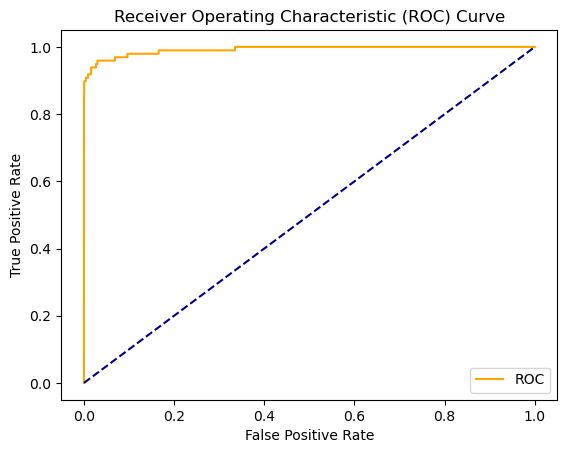

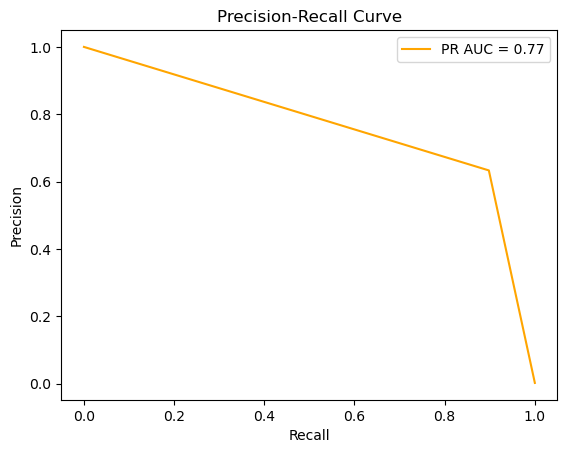

[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=1.848207090633376, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.848207090633376
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


(LGBMClassifier(bagging_fraction=0.8, bagging_freq=1, feature_fraction=0.8,
                lambda_l1=5, lambda_l2=0, learning_rate=0.20156246967856106,
                max_bin=292, max_depth=8, min_data_in_leaf=97,
                min_gain_to_split=1.848207090633376, num_leaves=215),
 0.7426160337552742,
 0.9989291106351603,
 0.9485311534574438,
 0.765614132243453,
 4.043440103530884)

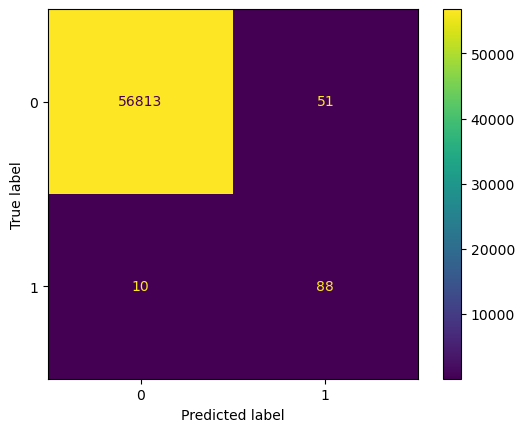

In [38]:
param_lgb = {'max_depth': 8,
		'learning_rate': 0.20156246967856106,
		'num_leaves': 215,
		'min_data_in_leaf': 97,
		'max_bin': 292,
		'lambda_l1': 5,
		'lambda_l2': 0,
		'min_gain_to_split': 1.848207090633376,
		'bagging_fraction': 0.8,
		'bagging_freq': 1,
		'feature_fraction':  0.8    
}

lgb_opt = lgb.LGBMClassifier(**param_lgb)
run_model(lgb_opt, X_train_smt, y_train_smt, X_test, y_test)